# **E-Commerce & Retail B2B Case Study Analysis**
---


**INTRODUCTION:**

  - ***`   This case study delves into the B2B segment of a multinational retail company dealing in sports goods, focusing on the challenge of managing credit terms and timely payments from business clients.`***

**PROBLEM STATEMENT:**

  - ***`  Schuster is a multinational retail company dealing in sports goods and accessories. Schuster conducts significant business with hundreds of its vendors, with whom it has credit arrangements. Unfortunately, not all vendors respect credit terms and some of them tend to make payments late. Schuster levies heavy late payment fees, although this procedure is not beneficial to either party in a long-term business relationship. The company has some employees who keep chasing vendors to get the payment on time; this procedure nevertheless also results in non-value-added activities, loss of time and financial impact. Schuster would thus try to understand its customers’ payment behaviour and predict the likelihood of late payments against open invoices.`***

  - ***`To understand how to approach this problem using data science, let’s first understand the payment process at Schuster now. Every time a transaction of goods takes place with a vendor, the accounting team raises an invoice and shares it with the vendor. This invoice contains the details of the goods, the invoice value, the creation date and the payment due date based on the credit terms as per the contract. Business with these vendors occurs quite frequently. Hence, there are always multiple invoices associated with each vendor at any given time.`***

**OBJECTIVES:**
  - ***`   Schuster would like to better understand the customers’ payment behaviour based on their past payment patterns (customer segmentation).`***
  - ***`   Using historical information, it wants to be able to predict the likelihood of delayed payment against open invoices from its customers.`***
  - ***`   It wants to use this information so that collectors can prioritise their work in following up with customers beforehand to get the payments on time.`***

**FILES USED:**
 - ***`Received_Payments_Data.csv`***
 - ***`Open_Invoice_data.csv`***
 - ***`Data+Dictionary.xlsx`***

## **STEP 1: LOADING & EXAMINING THE DATASET**


### ***1.1 LOAD ESSENTIAL LIBRARIES***

In [167]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### ***1.2 LOADING RECEIVED PAYMENT DATASET***

In [169]:
#Reading Datset - [Received_Payments_Data.csv]
rec_pay_data = pd.read_csv('/content/drive/MyDrive/Dataset/Received_Payments_Data.csv')
rec_pay_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,1.421000e+10,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


In [170]:
#Checking the shape
rec_pay_data.shape

(93937, 16)

In [171]:
#Checking the info
rec_pay_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RECEIPT_METHOD         93937 non-null  object 
 1   CUSTOMER_NAME          93937 non-null  object 
 2   CUSTOMER_NUMBER        93937 non-null  int64  
 3   RECEIPT_DOC_NO         93908 non-null  float64
 4   RECEIPT_DATE           93937 non-null  object 
 5   CLASS                  93937 non-null  object 
 6   CURRENCY_CODE          93937 non-null  object 
 7   Local Amount           93937 non-null  float64
 8   USD Amount             93937 non-null  float64
 9   INVOICE_ALLOCATED      93937 non-null  object 
 10  INVOICE_CREATION_DATE  93937 non-null  object 
 11  DUE_DATE               93937 non-null  object 
 12  PAYMENT_TERM           93937 non-null  object 
 13  INVOICE_CLASS          93937 non-null  object 
 14  INVOICE_CURRENCY_CODE  93937 non-null  object 
 15  IN

In [172]:
#Examining the distribution
rec_pay_data.describe()

,CUSTOMER_NUMBER,RECEIPT_DOC_NO,Local Amount,USD Amount
count,93937.000000,9.390800e+04,9.393700e+04,9.393700e+04
mean,12753.874033,1.583908e+11,1.066470e+06,5.312013e+05
std,14274.170829,3.885359e+10,1.546901e+06,9.508693e+05
min,1044.000000,1.421000e+10,0.000000e+00,0.000000e+00
25%,1888.000000,1.470000e+11,8.198039e+04,3.766298e+04
50%,4003.000000,1.510000e+11,4.053438e+05,1.810010e+05
75%,20884.000000,1.690000e+11,1.425606e+06,5.996137e+05
max,52940.000000,2.970000e+11,1.084983e+07,1.084983e+07


In [173]:
#Analyzing the count of unique values in each column
rec_pay_data.nunique()

,0
RECEIPT_METHOD,8
CUSTOMER_NAME,690
CUSTOMER_NUMBER,1054
RECEIPT_DOC_NO,73
RECEIPT_DATE,170
CLASS,1
CURRENCY_CODE,8
Local Amount,7752
USD Amount,7820
INVOICE_ALLOCATED,12986


In [174]:
#Counting null values
round(rec_pay_data.isna().sum()/len(rec_pay_data.index), 4)

,0
RECEIPT_METHOD,0.0000
CUSTOMER_NAME,0.0000
CUSTOMER_NUMBER,0.0000
RECEIPT_DOC_NO,0.0003
RECEIPT_DATE,0.0000
CLASS,0.0000
CURRENCY_CODE,0.0000
Local Amount,0.0000
USD Amount,0.0000
INVOICE_ALLOCATED,0.0000


 - ***`The "RECEIPT_DOC_NO" column contains 0.03% missing values. Since it is not a crucial feature for model development, it will be dropped.`***

In [175]:
#Dropping the "RECEIPT_DOC_NO" column from the dataset
rec_pay_data.drop('RECEIPT_DOC_NO', axis=1, inplace=True)

#Displaying the first few rows of the dataset
rec_pay_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


In [176]:
#Converting date-related columns to Pandas DateTime format

rec_pay_data['RECEIPT_DATE'] = pd.to_datetime(rec_pay_data['RECEIPT_DATE'])
rec_pay_data['INVOICE_CREATION_DATE'] = pd.to_datetime(rec_pay_data['INVOICE_CREATION_DATE'])
rec_pay_data['DUE_DATE'] = pd.to_datetime(rec_pay_data['DUE_DATE'])

In [177]:
#Sanity check
rec_pay_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         93937 non-null  object        
 1   CUSTOMER_NAME          93937 non-null  object        
 2   CUSTOMER_NUMBER        93937 non-null  int64         
 3   RECEIPT_DATE           93937 non-null  datetime64[ns]
 4   CLASS                  93937 non-null  object        
 5   CURRENCY_CODE          93937 non-null  object        
 6   Local Amount           93937 non-null  float64       
 7   USD Amount             93937 non-null  float64       
 8   INVOICE_ALLOCATED      93937 non-null  object        
 9   INVOICE_CREATION_DATE  93937 non-null  datetime64[ns]
 10  DUE_DATE               93937 non-null  datetime64[ns]
 11  PAYMENT_TERM           93937 non-null  object        
 12  INVOICE_CLASS          93937 non-null  object        
 13  I

- **GENERATING THE 'DEFAULT' TARGET COLUMN BASED ON LATE BILL PAYMENTS.**

In [178]:
#Creating 'default' column based on late payments
rec_pay_data['default'] = (rec_pay_data["RECEIPT_DATE"] > rec_pay_data["DUE_DATE"]).astype(int)

In [179]:
#Counting late and on-time payments
rec_pay_data.default.value_counts()

,count
default,
1,61978
0,31959


## **STEP 2: EXPLORATORY DATA ANALYSIS**

In [180]:
#Categorical Columns
cat_cols= ['CUSTOMER_NAME','CLASS','CURRENCY_CODE','PAYMENT_TERM','INVOICE_CLASS','INVOICE_CURRENCY_CODE', 'INVOICE_TYPE',
           'RECEIPT_METHOD']

#Numerical Columns
num_cols= ['Local Amount', 'USD Amount']

### ***2.1 UNIVARIATE ANALYSIS***

#### **2.1.1 NUMERICAL COLUMNS**

In [181]:
#Summary of the 'Local Amount' column
rec_pay_data['Local Amount'].describe().round()

,Local Amount
count,93937.0
mean,1066470.0
std,1546901.0
min,0.0
25%,81980.0
50%,405344.0
75%,1425606.0
max,10849829.0


In [182]:
#Counting bills where 'Local Amount' is 0
rec_pay_data[rec_pay_data['Local Amount'] == 0].shape

(1126, 16)

- **DROPPING 1126 BILLS WITH 'LOCAL AMOUNT' EQUAL TO 0**


In [183]:
rec_pay_data = rec_pay_data[rec_pay_data['Local Amount'] > 0]

#Checking shape of the dataset
rec_pay_data.shape

(92811, 16)

In [184]:
#Rechecking the 'Local Amount' column summary
rec_pay_data['Local Amount'].describe().round()

,Local Amount
count,92811.0
mean,1079408.0
std,1551763.0
min,5.0
25%,90577.0
50%,415084.0
75%,1465108.0
max,10849829.0


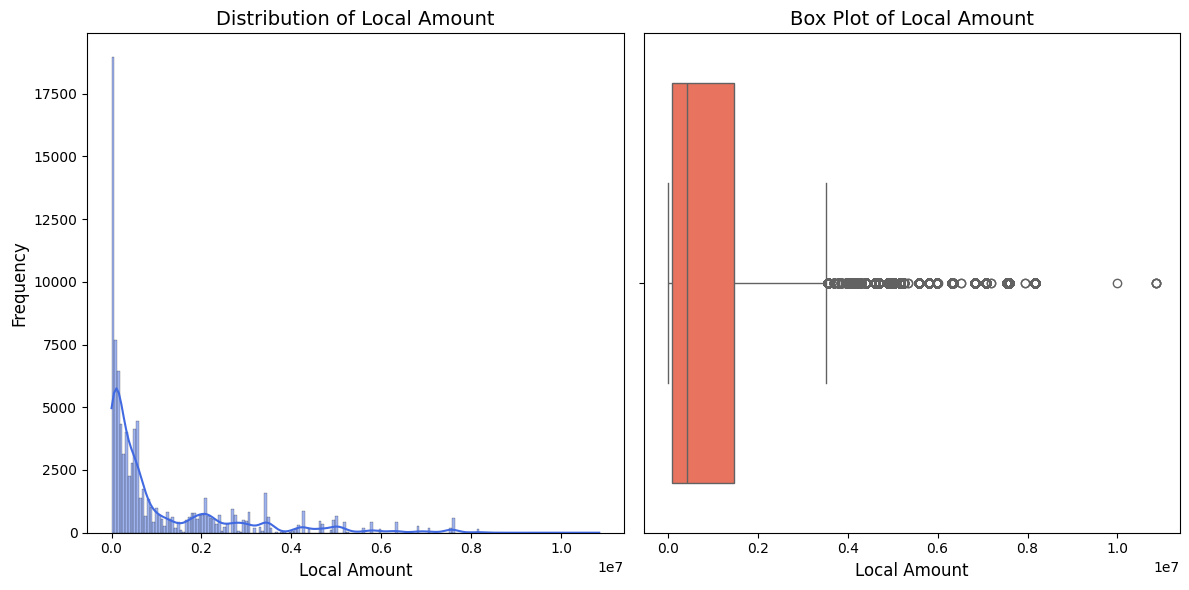

In [185]:
#Plotting the distribution of 'Local Amount'

plt.figure(figsize=(12,6))

#Distribution Plot
plt.subplot(1,2,1)
sns.histplot(rec_pay_data['Local Amount'], kde=True, color='royalblue')
plt.title("Distribution of Local Amount", fontsize=14)
plt.xlabel("Local Amount", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

#Box Plot
plt.subplot(1,2,2)
sns.boxplot(x=rec_pay_data['Local Amount'], color='tomato')
plt.title("Box Plot of Local Amount", fontsize=14)
plt.xlabel("Local Amount", fontsize=12)

plt.tight_layout()
plt.show()

- **REMOVING 'LOCAL AMOUNT' AS IT LACKS A SINGLE CURRENCY AND 'USD AMOUNT' IS AVAILABLE.**


In [186]:
#Removing the 'Local Amount' column
rec_pay_data.drop('Local Amount', axis=1, inplace=True)

#Checking head of the dataset
rec_pay_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,default
0,WIRE,C EA Corp,37403,2021-04-20,PMT,USD,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1
1,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1
2,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0
3,WIRE,FARO Corp,1409,2021-01-31,PMT,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1
4,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1


In [187]:
#'USD Amount' column
rec_pay_data['USD Amount'].describe().round()

,USD Amount
count,92811.0
mean,537646.0
std,954807.0
min,1.0
25%,40453.0
50%,191287.0
75%,599614.0
max,10849829.0


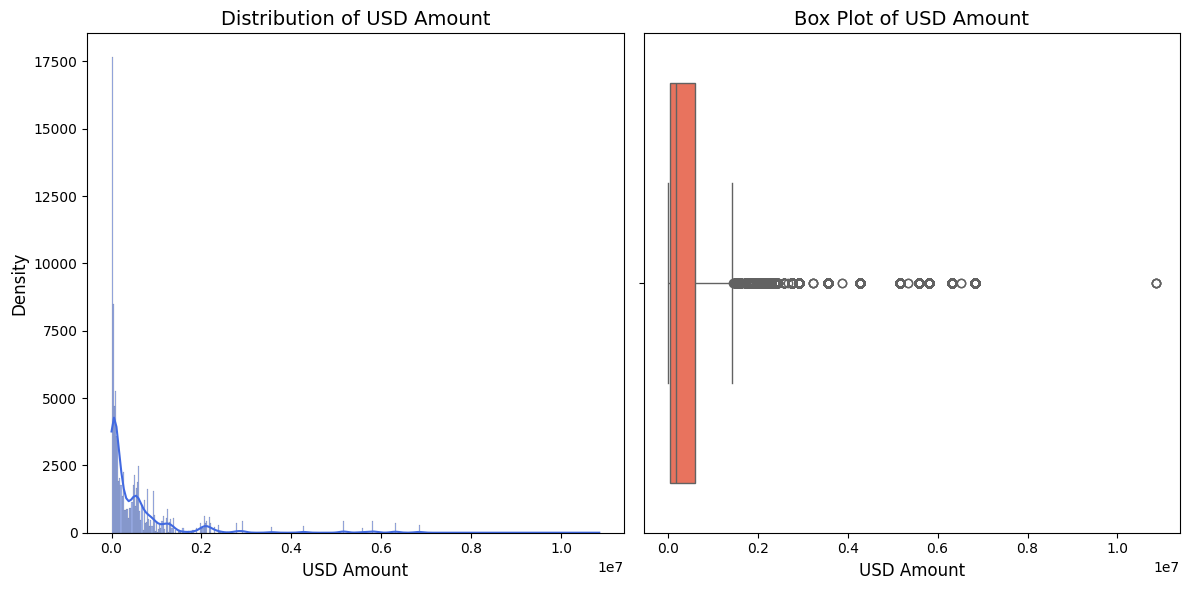

In [188]:
#Visualizing the distribution of 'USD Amount'
plt.figure(figsize=(12,6))

#Histogram Plot
plt.subplot(1,2,1)
sns.histplot(rec_pay_data['USD Amount'], kde=True, color='royalblue')
plt.title("Distribution of USD Amount", fontsize=14)
plt.xlabel("USD Amount", fontsize=12)
plt.ylabel("Density", fontsize=12)

#Box Plot
plt.subplot(1,2,2)
sns.boxplot(x=rec_pay_data['USD Amount'], color='tomato')
plt.title("Box Plot of USD Amount", fontsize=14)
plt.xlabel("USD Amount", fontsize=12)

plt.tight_layout()
plt.show()


#### **2.1.2 CATEGORICAL COLUMNS**


In [189]:
#Counting unique customer names
rec_pay_data['CUSTOMER_NAME'].nunique()

689

In [190]:
#Top 10 customers based on total invoices
rec_pay_data['CUSTOMER_NAME'].value_counts().head(10)

,count
CUSTOMER_NAME,
SEPH Corp,23075
FARO Corp,15004
PARF Corp,6624
ALLI Corp,5645
AREE Corp,2224
DEBE Corp,2133
RADW Corp,1647
YOUG Corp,1480
HABC Corp,1402


In [191]:
rec_pay_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92811 entries, 0 to 93936
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         92811 non-null  object        
 1   CUSTOMER_NAME          92811 non-null  object        
 2   CUSTOMER_NUMBER        92811 non-null  int64         
 3   RECEIPT_DATE           92811 non-null  datetime64[ns]
 4   CLASS                  92811 non-null  object        
 5   CURRENCY_CODE          92811 non-null  object        
 6   USD Amount             92811 non-null  float64       
 7   INVOICE_ALLOCATED      92811 non-null  object        
 8   INVOICE_CREATION_DATE  92811 non-null  datetime64[ns]
 9   DUE_DATE               92811 non-null  datetime64[ns]
 10  PAYMENT_TERM           92811 non-null  object        
 11  INVOICE_CLASS          92811 non-null  object        
 12  INVOICE_CURRENCY_CODE  92811 non-null  object        
 13  INVOIC

In [192]:
#Top 10 customers by total invoice amount (USD)
rec_pay_data.groupby('CUSTOMER_NAME')['USD Amount'].sum().sort_values(ascending=False).head(10)

,USD Amount
CUSTOMER_NAME,
SEPH Corp,3.253371e+10
FARO Corp,5.790071e+09
PARF Corp,3.200510e+09
ALLI Corp,2.580741e+09
AREE Corp,1.125144e+09
HABC Corp,5.343216e+08
RADW Corp,3.622376e+08
L OR Corp,2.955509e+08
CGR Corp,2.795162e+08


In [193]:
#Counting unique values in the 'CLASS' column
rec_pay_data['CLASS'].nunique()

1

In [194]:
#Removing the 'CLASS' column as it contains a single unique value
rec_pay_data.drop('CLASS', axis=1, inplace=True)

In [195]:
#Counting unique values in the 'CURRENCY_CODE' column
rec_pay_data['CURRENCY_CODE'].nunique()

8

In [196]:
#Frequency of each currency code
rec_pay_data['CURRENCY_CODE'].value_counts()

,count
CURRENCY_CODE,
AED,36027
SAR,35784
USD,19361
EUR,1438
GBP,130
BHD,59
KWD,10
QAR,2


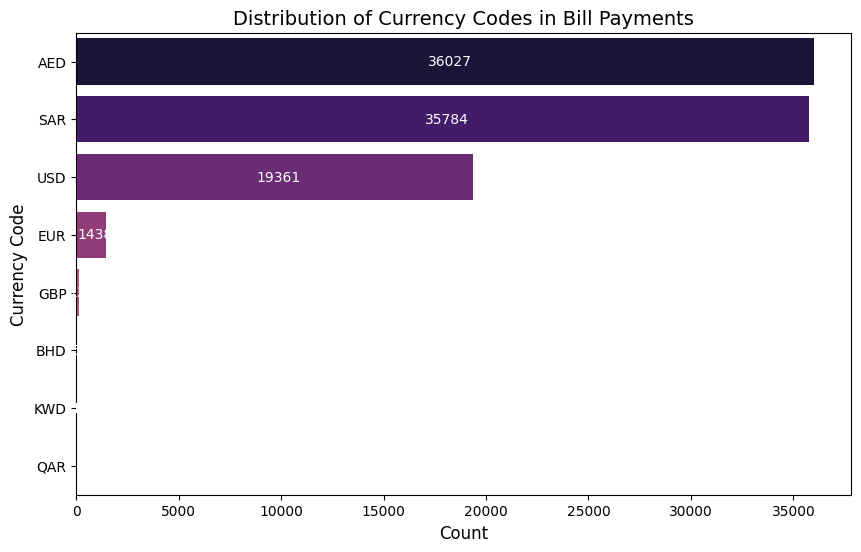

In [197]:
#Horizontal bar chart for currency distribution
plt.figure(figsize=(10,6))

ax = sns.countplot(y=rec_pay_data['CURRENCY_CODE'],
                   order=rec_pay_data['CURRENCY_CODE'].value_counts().index,
                   palette='magma')

plt.xlabel("Count", fontsize=12)
plt.ylabel("Currency Code", fontsize=12)
plt.title("Distribution of Currency Codes in Bill Payments", fontsize=14)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=10, color='white', padding=3)

plt.show()

  - ***`   Most transactions are processed in USD, SAR, and AED, with minimal use of other currencies.`***

In [198]:
#Counting unique values in the 'PAYMENT_TERM' column
rec_pay_data['PAYMENT_TERM'].nunique()

42

In [199]:
#Displaying the list of unique values in 'PAYMENT_TERM' column
rec_pay_data['PAYMENT_TERM'].unique()

array(['30 Days from EOM', '30 Days from Inv Date', '45 Days from EOM',
       'Immediate', '100% Adv Payment', 'Immediate Payment',
       '15 Days from EOM', '25 DAYS FROM EOM', '60 Days from EOM',
       '60 Days from Inv Date', '45 Days from Inv Date',
       '90 Days from Inv Date', '15 Days from Inv Date',
       'Cash on Delivery', '45 DAYS + EOM', '90 Days from EOM',
       'On Consignment', 'EOM', '7 Days from Inv Date',
       '50% ADVANCE PAYMENT AND 50% UPON RECEIVING THE SHIPMENT',
       '75 Days from EOM', 'Standby LC at 30 days',
       '30% advance 70% after 30 days from invoice date', 'LC at 60 days',
       '50% Advance 50% INVDATE+60 DAYS', '120 Days from EOM',
       '75 Days from Inv Date', 'LCSight', '180 DAYS FROM INV DATE',
       'LC at 90 days', '30% advance 70% after 60 days from invoice date',
       'Cash Against Document at sight', 'Advance with discount',
       '50% ADV 50% 30 Days', '120 Days from Inv Date',
       '25% ADVANCE, 75% 30 DAYS FROM INVOIC

In [200]:
#Listing the top 10 most common PAYMENT_TERM values
rec_pay_data['PAYMENT_TERM'].value_counts().head(10)

,count
PAYMENT_TERM,
60 Days from Inv Date,19742
30 Days from Inv Date,14022
60 Days from EOM,12512
30 Days from EOM,11301
15 Days from EOM,7533
Immediate Payment,5468
Immediate,4946
90 Days from EOM,3893
45 Days from Inv Date,3550


In [201]:
#Counting occurrences of each 'INVOICE_CLASS' column
rec_pay_data['INVOICE_CLASS'].value_counts()

,count
INVOICE_CLASS,
INV,87313
CM,4946
DM,552


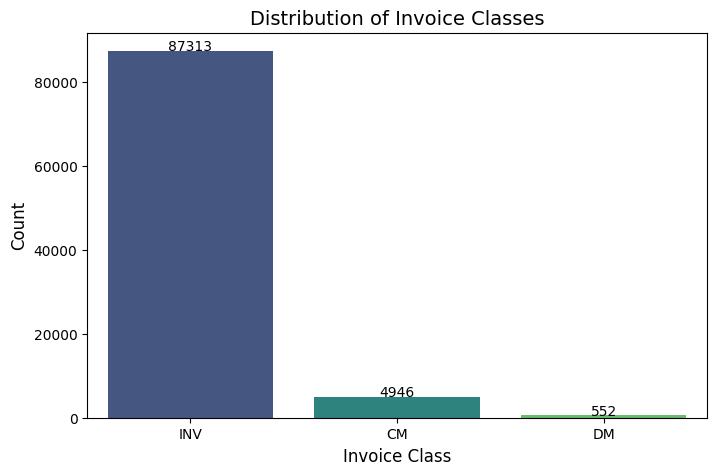

In [202]:
#Visualizing the INVOICE_CLASS distribution
plt.figure(figsize=(8,5))

ax = sns.countplot(data=rec_pay_data,
                   x='INVOICE_CLASS',
                   order=rec_pay_data['INVOICE_CLASS'].value_counts().index,
                   palette='viridis')

plt.xlabel("Invoice Class", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Invoice Classes", fontsize=14)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=-2, color='black')

plt.show()

  - ***`   'INV' has the highest number of bills in the INVOICE_CLASS column.`***


In [203]:
#Counting the unique values in the 'INVOICE_CURRENCY_CODE' column
rec_pay_data['INVOICE_CURRENCY_CODE'].nunique()

10

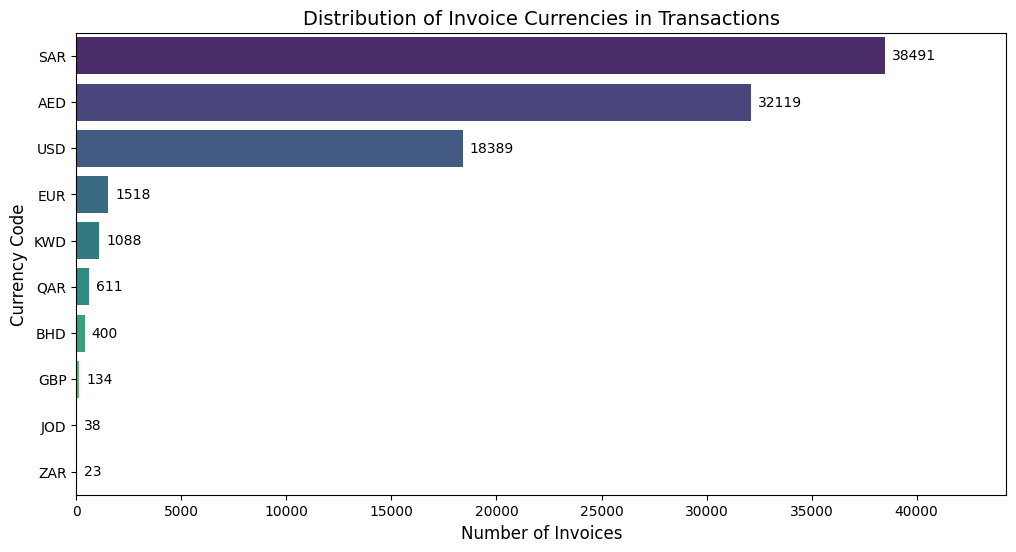

In [204]:
#Plotting Invoice Currency Distribution
plt.figure(figsize=(12,6))

ax = sns.countplot(data=rec_pay_data,
                   y='INVOICE_CURRENCY_CODE',
                   order=rec_pay_data['INVOICE_CURRENCY_CODE'].value_counts().index,
                   palette='viridis')

plt.xlabel("Number of Invoices", fontsize=12)
plt.ylabel("Currency Code", fontsize=12)
plt.title("Distribution of Invoice Currencies in Transactions", fontsize=14)

ax.set_xlim(0, rec_pay_data['INVOICE_CURRENCY_CODE'].value_counts().max() * 1.15)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10, padding=5, color='black', label_type='edge')

plt.show()

  - ***`   Most invoices were generated in SAR, AED, and USD currencies.`***


In [205]:
#Counting occurrences of each 'INVOICE_TYPE' column
rec_pay_data['INVOICE_TYPE'].value_counts()

,count
INVOICE_TYPE,
Goods,66569
Non Goods,26242


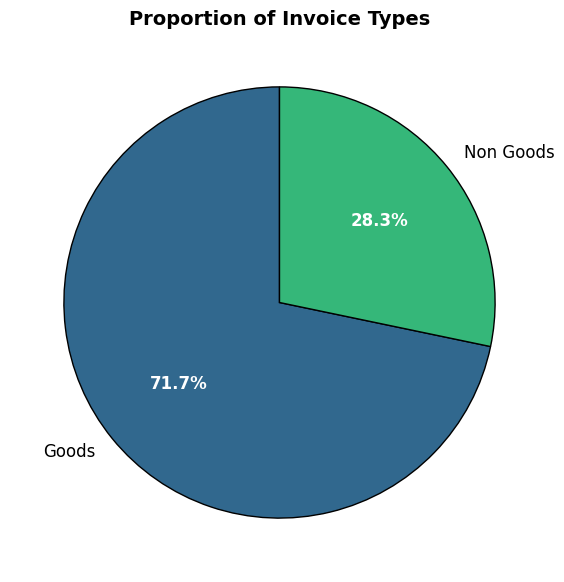

In [206]:
# Visualizing the distribution of INVOICE_TYPE
plt.figure(figsize=(7,7))

colors = sns.color_palette("viridis", len(rec_pay_data['INVOICE_TYPE'].unique()))

wedges, texts, autotexts = plt.pie(
    rec_pay_data['INVOICE_TYPE'].value_counts(),
    labels=rec_pay_data['INVOICE_TYPE'].value_counts().index,
    autopct='%1.1f%%', colors=colors, startangle=90,
    wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 12})

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_weight("bold")

plt.title("Proportion of Invoice Types", fontsize=14, fontweight="bold")
plt.ylabel('')
plt.show()

  - ***` The majority (71.7%) of invoices are for Goods`***

In [207]:
#Counting occurrences of each 'RECEIPT_METHOD' column
rec_pay_data['RECEIPT_METHOD'].value_counts()

,count
RECEIPT_METHOD,
WIRE,83281
AP/AR Netting,4847
CHEQUE,3472
CASH,782
I/C WIRE,211
PDC,210
I/C Check,6
I/C CASH,2


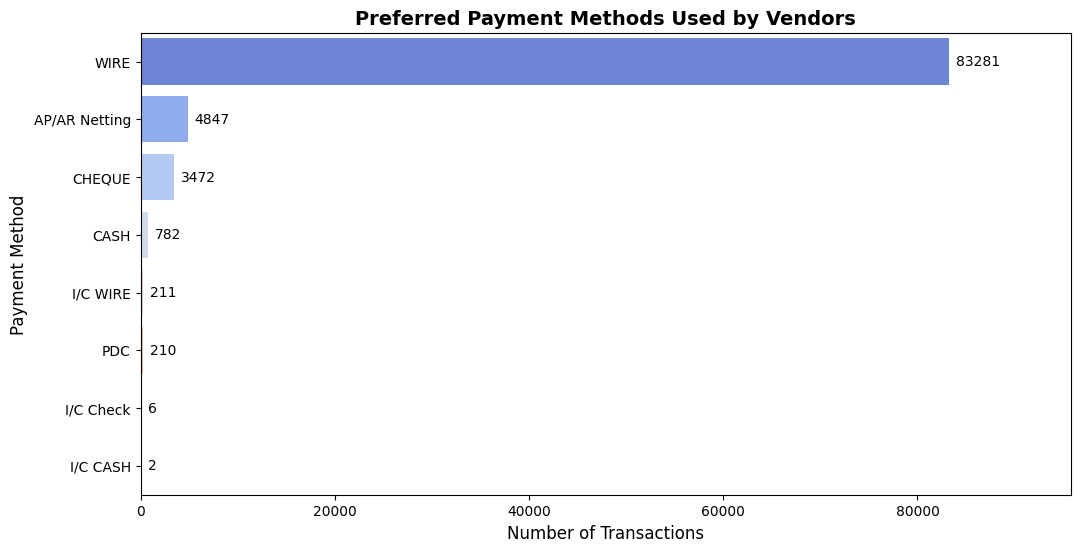

In [208]:
#Visualizing the distribution of RECEIPT_METHOD
plt.figure(figsize=(12,6))  # Increased figure width for more space

ax = sns.countplot(data=rec_pay_data,
                   y='RECEIPT_METHOD',
                   order=rec_pay_data['RECEIPT_METHOD'].value_counts().index,
                   palette='coolwarm')

plt.xlabel("Number of Transactions", fontsize=12)
plt.ylabel("Payment Method", fontsize=12)
plt.title("Preferred Payment Methods Used by Vendors", fontsize=14, fontweight="bold")

ax.set_xlim(0, rec_pay_data['RECEIPT_METHOD'].value_counts().max() * 1.15)  # Extends axis by 15%

for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10, padding=5, color='black', label_type='edge')

plt.show()

  - ***`   WIRE is the most preferred payment method for bill payments.`***

- **Checking for Data Imbalance**

In [209]:
#Analyzing the distribution of the target variable 'default'
rec_pay_data["default"].value_counts(normalize= True)

,proportion
default,
1,0.656528
0,0.343472


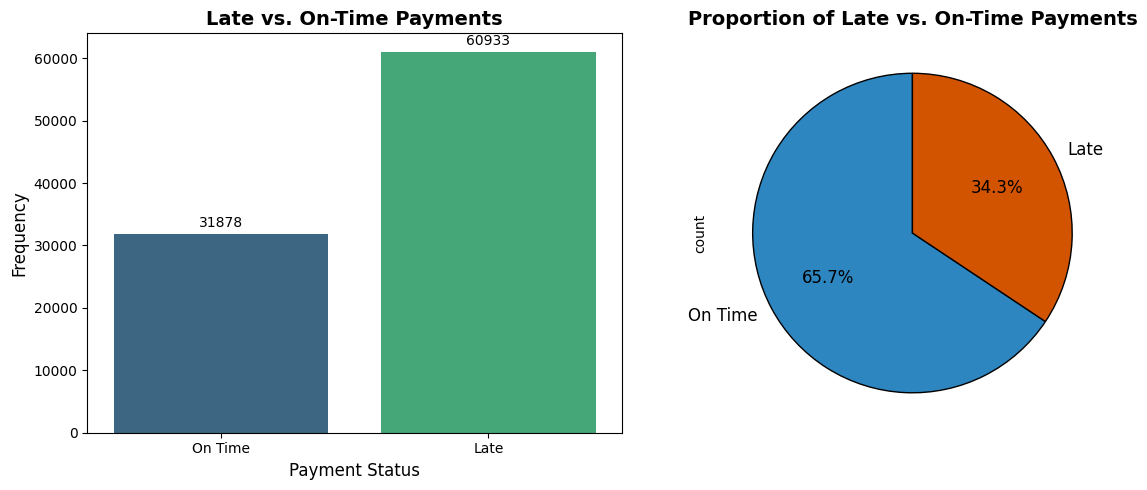

In [210]:
#Visualizing the 'default' column distribution
plt.figure(figsize=(12,5))

# Subplot 1: Bar Chart for 'default' distribution
plt.subplot(1,2,1)
ax = sns.countplot(x='default', data=rec_pay_data, palette='viridis')

plt.title("Late vs. On-Time Payments", fontsize=14, fontweight="bold")
plt.xlabel("Payment Status", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(ticks=[0,1], labels=["On Time", "Late"])

for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10, padding=3, color='black')

# Subplot 2: Pie Chart for Data Imbalance
plt.subplot(1,2,2)

labels = ["On Time", "Late"]
colors = ['#2E86C1', '#D35400']

rec_pay_data['default'].value_counts().plot.pie(
    autopct='%1.1f%%', colors=colors, startangle=90, labels=labels,
    wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 12})

plt.title("Proportion of Late vs. On-Time Payments", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()


  - ***`   The target variable shows a balanced distribution.`***

### ***2.2 BIVARIATE ANALYSIS***

In [211]:
#Extracting the month from date columns
rec_pay_data['month_reciept'] = rec_pay_data['RECEIPT_DATE'].dt.month
rec_pay_data['month_inv_creation'] = rec_pay_data['INVOICE_CREATION_DATE'].dt.month
rec_pay_data['month_due'] = rec_pay_data['DUE_DATE'].dt.month

In [212]:
#Monthly trend of due invoices
orders_due_month = rec_pay_data.groupby('month_due').count()['DUE_DATE']
orders_due_month

,DUE_DATE
month_due,
1,13295
2,12893
3,14605
4,14051
5,13321
6,10479
7,1523
8,1075
9,914


In [213]:
#Assessing the impact of due months on late payments

#Creating a pivot table to analyze monthly variations in late payments
late_dues = rec_pay_data.groupby('month_due')['default'].mean()
late_dues.sort_index(ascending= True)

,default
month_due,
1,0.716134
2,0.688048
3,0.620199
4,0.620454
5,0.559643
6,0.416070
7,0.363099
8,0.793488
9,0.974836


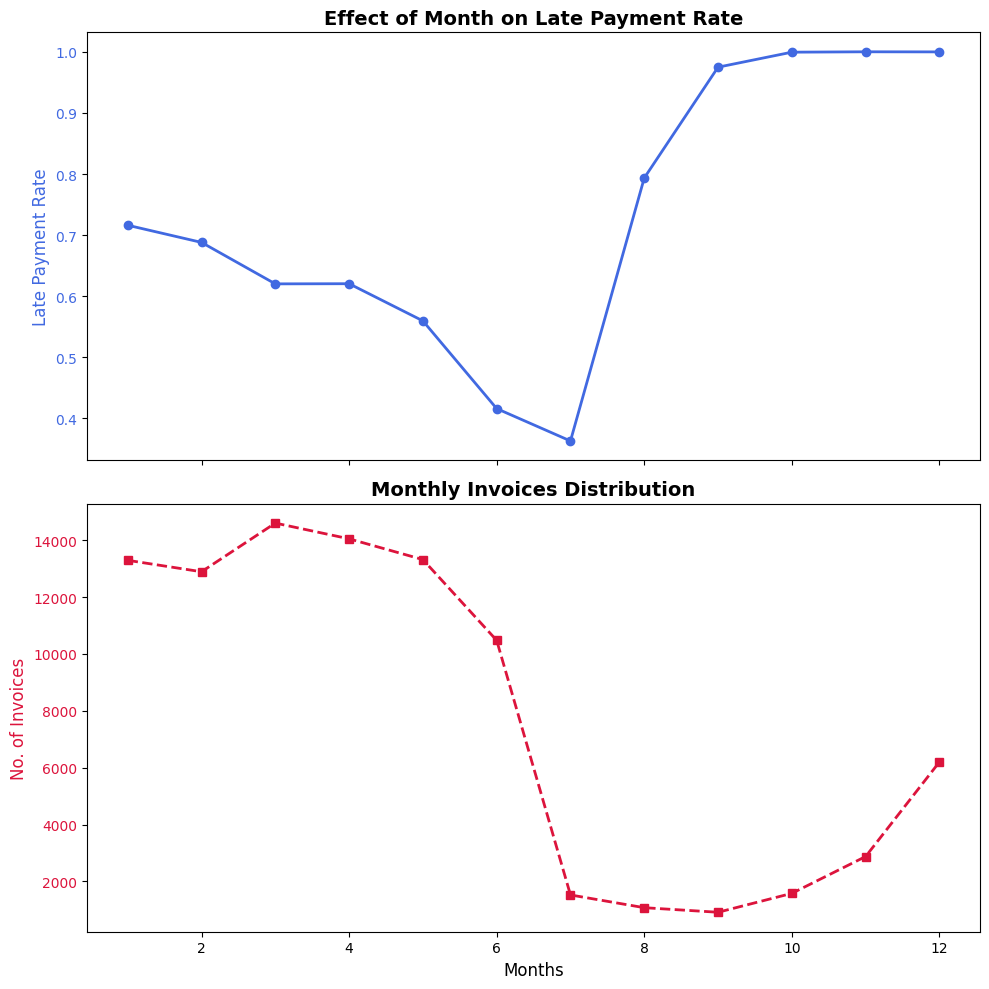

In [214]:
#Visualizing the influence of month on late payment rate
fig, axes = plt.subplots(2, 1, figsize=(10,10), sharex=True)

#Subplot 1: Late Payment Rate per Month
axes[0].plot(late_dues, color='royalblue', marker='o', linestyle='-', linewidth=2)
axes[0].set_title("Effect of Month on Late Payment Rate", fontsize=14, fontweight="bold")
axes[0].set_xlabel("")
axes[0].set_ylabel("Late Payment Rate", fontsize=12, color='royalblue')
axes[0].tick_params(axis='y', labelcolor='royalblue')

#Subplot 2: Number of Invoices per Month
axes[1].plot(orders_due_month, color='crimson', marker='s', linestyle='--', linewidth=2)
axes[1].set_title("Monthly Invoices Distribution", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Months", fontsize=12)
axes[1].set_ylabel("No. of Invoices", fontsize=12, color='crimson')
axes[1].tick_params(axis='y', labelcolor='crimson')

plt.tight_layout()
plt.show()

  - ***`   March records the highest number of invoices, yet the late payment rate remains relatively low. `***
  - ***`   July has the lowest late payment rate, likely due to a significantly lower invoice volume. `***
  - ***`   In the latter half of the year, late payments increase sharply from July onward, despite a decline in invoice count compared to the first half. `***

In [215]:
#Analyzing Payment Receipt Trends

#Count of payments received per month
order_month_receipt = rec_pay_data.groupby('month_reciept')['DUE_DATE'].count()

#Proportion of late payments among received payments per month
monthly_receipt = rec_pay_data.groupby('month_due')['default'].mean()

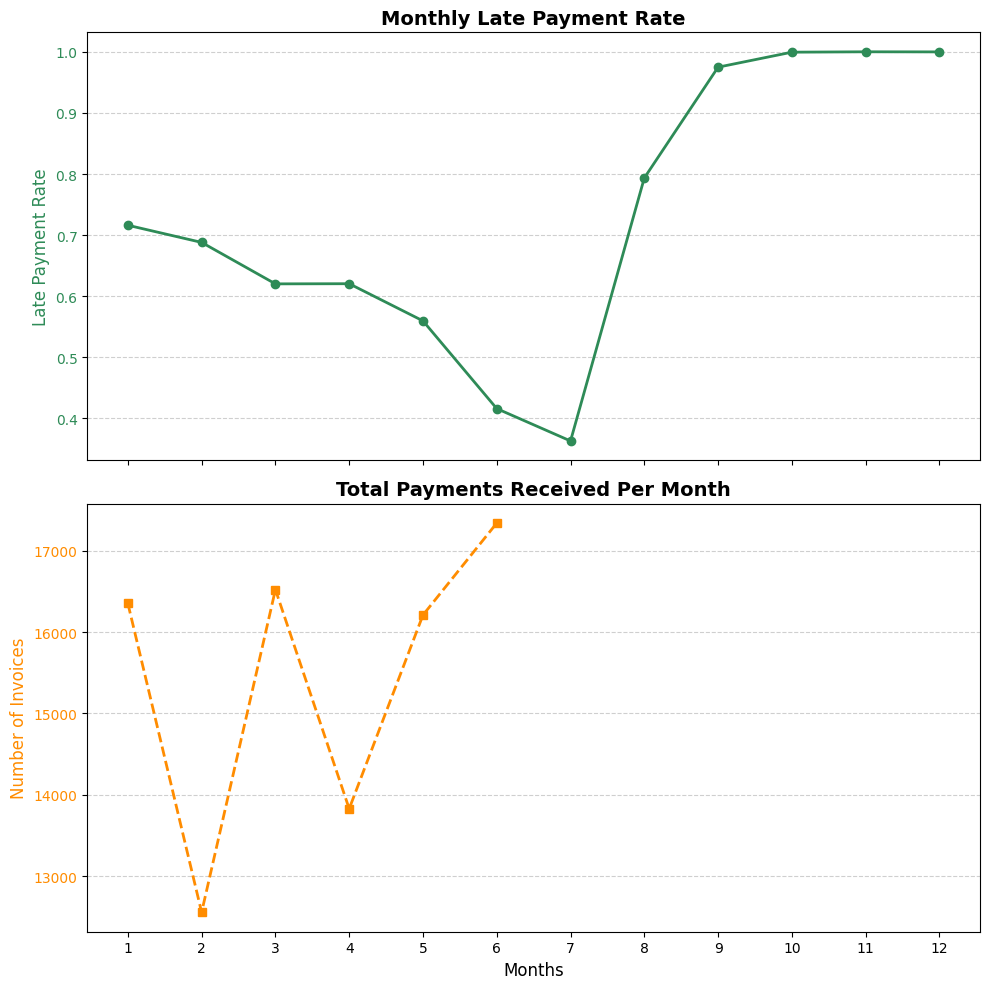

In [216]:
#Visualizing the impact of due month on late payment rate
fig, axes = plt.subplots(2, 1, figsize=(10,10), sharex=True)

#Subplot 1: Late Payment Rate per Month
axes[0].plot(monthly_receipt, color='seagreen', marker='o', linestyle='-', linewidth=2)
axes[0].set_title("Monthly Late Payment Rate", fontsize=14, fontweight="bold")
axes[0].set_ylabel("Late Payment Rate", fontsize=12, color='seagreen')
axes[0].tick_params(axis='y', labelcolor='seagreen')
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

#Subplot 2: Number of Payments Received per Month
axes[1].plot(order_month_receipt, color='darkorange', marker='s', linestyle='--', linewidth=2)
axes[1].set_title("Total Payments Received Per Month", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Months", fontsize=12)
axes[1].set_ylabel("Number of Invoices", fontsize=12, color='darkorange')
axes[1].tick_params(axis='y', labelcolor='darkorange')
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

plt.xticks(range(1,13))
plt.tight_layout()
plt.show()

- ***`From the 7th month onward, no payments were processed for due invoices. `***

In [217]:
#Analyzing Invoice Creation Trends

#Count of invoices generated per month
orders_month_created = rec_pay_data.groupby('month_inv_creation')['DUE_DATE'].count()

#Percentage of late payments among created invoices per month
month_created = rec_pay_data.groupby('month_inv_creation')['default'].mean()


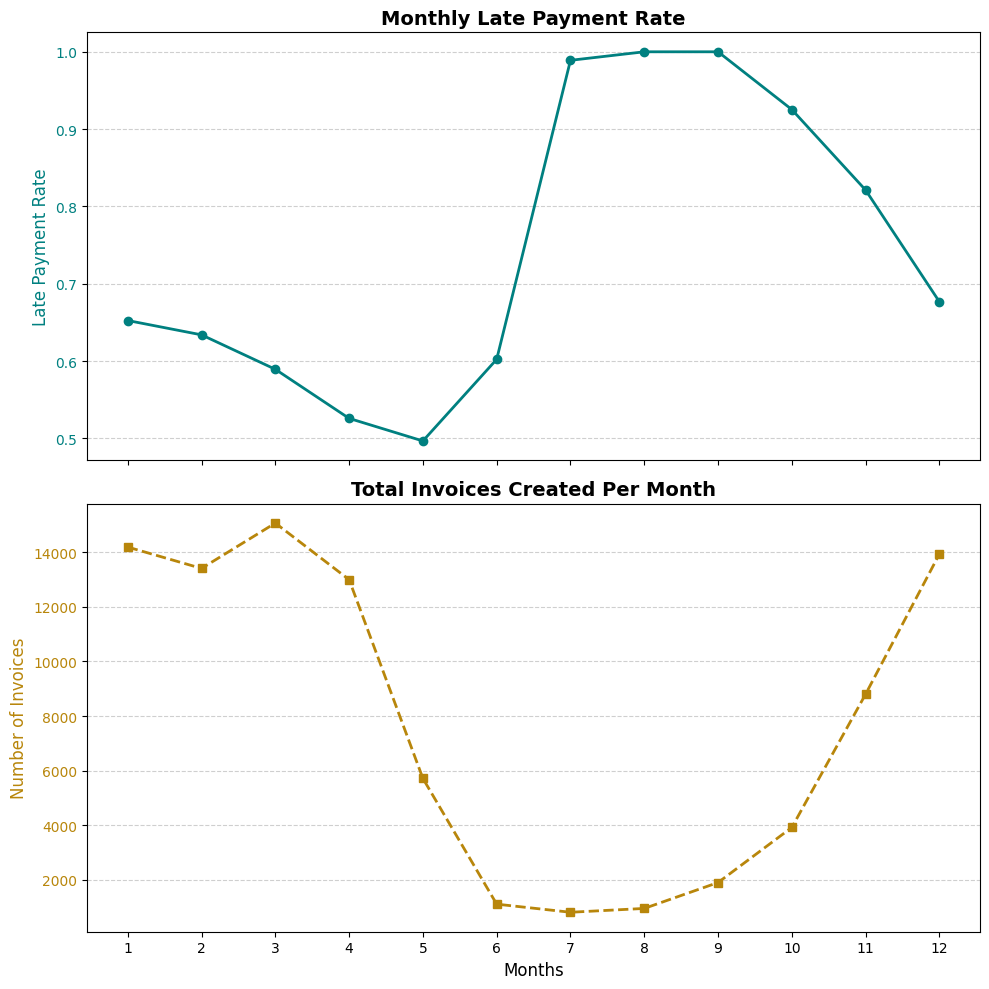

In [218]:
#Analyzing the impact of due months on late payment rate
fig, axes = plt.subplots(2, 1, figsize=(10,10), sharex=True)

#Subplot 1: Late Payment Rate per Month
axes[0].plot(month_created, color='teal', marker='o', linestyle='-', linewidth=2)
axes[0].set_title("Monthly Late Payment Rate", fontsize=14, fontweight="bold")
axes[0].set_ylabel("Late Payment Rate", fontsize=12, color='teal')
axes[0].tick_params(axis='y', labelcolor='teal')
axes[0].grid(axis='y', linestyle='--', alpha=0.6)  #Adding light grid lines for readability

#Subplot 2: Number of Invoices Created per Month
axes[1].plot(orders_month_created, color='darkgoldenrod', marker='s', linestyle='--', linewidth=2)
axes[1].set_title("Total Invoices Created Per Month", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Months", fontsize=12)
axes[1].set_ylabel("Number of Invoices", fontsize=12, color='darkgoldenrod')
axes[1].tick_params(axis='y', labelcolor='darkgoldenrod')
axes[1].grid(axis='y', linestyle='--', alpha=0.6)  #Adding light grid lines for clarity

plt.xticks(range(1,13))
plt.tight_layout()
plt.show()


- ***`The late payment rate declines steadily from January (Month 1) to May (Month 5), indicating timely payments during this period.`***
- ***`A sharp increase in late payments is observed from July to September (Months 7, 8, and 9), suggesting a potential seasonal or financial trend affecting vendor payments.`***
- ***`Late payment rates remain consistently high beyond September, indicating that once a vendor delays payments, they are likely to continue defaulting in the following months. `***

In [219]:
#Calculating statistical insights for USD Amount based on payment status

usd_amt_late = rec_pay_data.pivot_table(values='USD Amount',
                                        index='default',
                                        aggfunc=['mean', 'median', np.std]).reset_index()
usd_amt_late

,default,mean,median,std
,,USD Amount,USD Amount,USD Amount
0,0,575247.544230,224785.0410,879205.782363
1,1,517974.153529,165499.3105,991505.462081


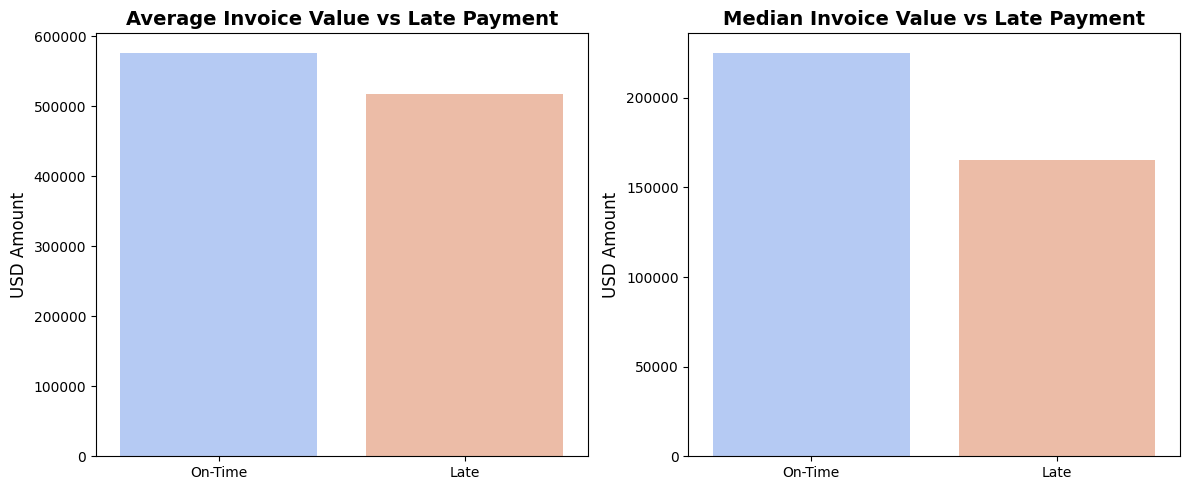

In [220]:
#Visualizing the difference between mean and median invoice value with respect to late payment
plt.figure(figsize=(12,5))

#Subplot 1: Mean Invoice Value vs Late Payment
plt.subplot(1,2,1)
sns.barplot(data=usd_amt_late, x='default', y=('mean','USD Amount'), palette='coolwarm')
plt.xticks((0,1), ('On-Time', 'Late'))
plt.title("Average Invoice Value vs Late Payment", fontsize=14, fontweight="bold")
plt.xlabel("")
plt.ylabel("USD Amount", fontsize=12)

#Subplot 2: Median Invoice Value vs Late Payment
plt.subplot(1,2,2)
sns.barplot(data=usd_amt_late, x='default', y=('median','USD Amount'), palette='coolwarm')
plt.xticks((0,1), ('On-Time', 'Late'))
plt.title("Median Invoice Value vs Late Payment", fontsize=14, fontweight="bold")
plt.xlabel("")
plt.ylabel("USD Amount", fontsize=12)

plt.tight_layout()
plt.show()

- ***`On-time payments have a higher average and median invoice value compared to late payments, suggesting that larger transactions are more likely to be paid on time. `***

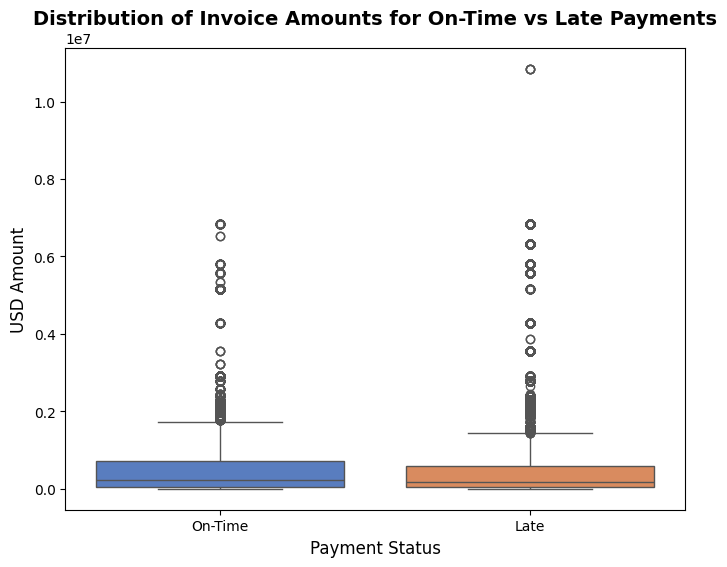

In [221]:
#Visualizing USD Amount Comparison between On-Time and Late Payments
plt.figure(figsize=(8,6))

sns.boxplot(y='USD Amount', x='default', data=rec_pay_data, palette='muted')  # Improved color scheme
plt.xticks([0,1], ['On-Time', 'Late'])
plt.title("Distribution of Invoice Amounts for On-Time vs Late Payments", fontsize=14, fontweight="bold")
plt.xlabel("Payment Status", fontsize=12)
plt.ylabel("USD Amount", fontsize=12)

plt.show()

In [222]:
#Counting the total number of invoices for each customer, sorted in descending order
customer_total_orders = rec_pay_data.groupby('CUSTOMER_NAME').count()['default'].sort_values(ascending=False).reset_index()

#Calculating the average late payment rate per customer, sorted in descending order
customer_total_orders_late = rec_pay_data.groupby('CUSTOMER_NAME')['default'].mean().sort_values(ascending=False).reset_index()

In [223]:
#Identifying key customers with more than 500 total orders
imp_cust = customer_total_orders[customer_total_orders['default'] > 500]['CUSTOMER_NAME']
imp_cust

,CUSTOMER_NAME
0,SEPH Corp
1,FARO Corp
2,PARF Corp
3,ALLI Corp
4,AREE Corp
5,DEBE Corp
6,RADW Corp
7,YOUG Corp
8,HABC Corp
9,CARR Corp


In [224]:
#Analyzing late payment rates for key customers (customers with more than 500 orders)
imp_cust_late = customer_total_orders_late[customer_total_orders_late['CUSTOMER_NAME'].isin(imp_cust)]
imp_cust_late

,CUSTOMER_NAME,default
201,YOUG Corp,1.000000
246,VAVA Corp,0.937873
256,AL T Corp,0.917241
273,LIFE Corp,0.899522
287,PARI Corp,0.876153
306,PARF Corp,0.847222
308,AL S Corp,0.842788
341,CHRI Corp,0.787276
342,CARR Corp,0.786765
380,HABC Corp,0.726106


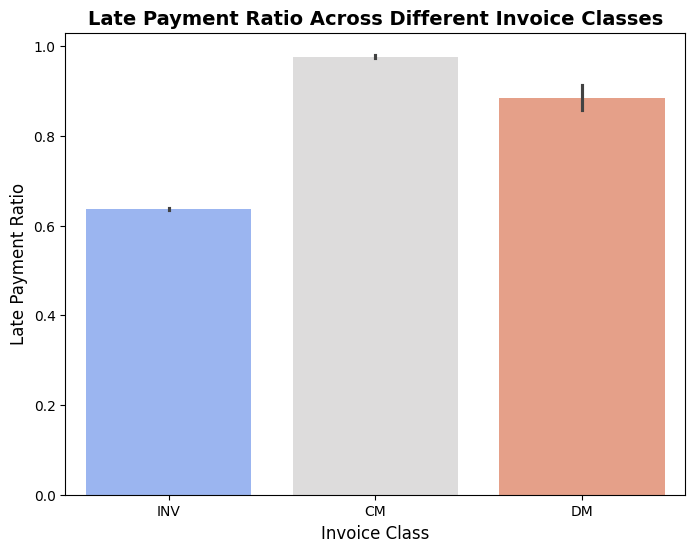

In [225]:
#Analyzing the late payment ratio across different invoice classes in 'INVOICE_CLASS' column
plt.figure(figsize=(8,6))

sns.barplot(data=rec_pay_data, x='INVOICE_CLASS', y='default', estimator=np.mean, palette='coolwarm')

plt.title("Late Payment Ratio Across Different Invoice Classes", fontsize=14, fontweight="bold")
plt.xlabel("Invoice Class", fontsize=12)
plt.ylabel("Late Payment Ratio", fontsize=12)

plt.show()

  - ***`   The CM invoice class has the highest late payment ratio, indicating a higher tendency for delayed payments. `***
  - ***`   The DM invoice class also experiences frequent late payments, though slightly lower than CM. `***
  - ***`   The INV invoice class has the lowest late payment ratio, suggesting that invoices under this category are more likely to be paid on time. `***

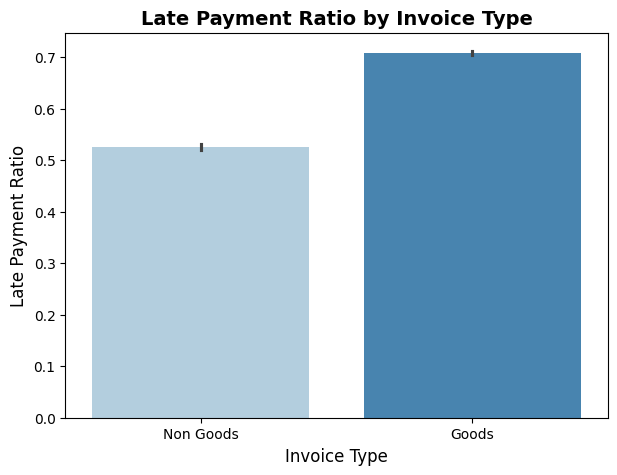

In [226]:
#Analyzing the late payment ratio across different invoice types in INVOICE_TYPE' class
plt.figure(figsize=(7,5))

sns.barplot(data=rec_pay_data, x='INVOICE_TYPE', y='default', estimator=np.mean, palette='Blues')

plt.title("Late Payment Ratio by Invoice Type", fontsize=14, fontweight="bold")
plt.xlabel("Invoice Type", fontsize=12)
plt.ylabel("Late Payment Ratio", fontsize=12)

plt.show()

  - ***`   The Goods invoice type has a higher late payment ratio compared to Non-Goods.`***
  - ***`   The Non-Goods invoices show a lower likelihood of late payments, suggesting possible differences in credit policies or urgency of payment between the two types.`***
  - ***`   This trend indicates that Goods-related invoices may require stricter follow-up strategies to improve timely payments.`***

### ***2.3 FEATURE ENGINEERING***

In [227]:
#Calculating the cumulative sum of payment term distribution in 'PAYMENT_TERM' column
pay_term_cumsum = rec_pay_data['PAYMENT_TERM'].value_counts(normalize=True).cumsum()
pay_term_cumsum

,proportion
PAYMENT_TERM,
60 Days from Inv Date,0.212712
30 Days from Inv Date,0.363793
60 Days from EOM,0.498605
30 Days from EOM,0.620368
15 Days from EOM,0.701533
Immediate Payment,0.760449
Immediate,0.813740
90 Days from EOM,0.855685
45 Days from Inv Date,0.893935


In [228]:
#Standardizing similar payment term labels for consistency

#Replacing 'Immediate' with 'Immediate Payment' to unify the labels
rec_pay_data['PAYMENT_TERM'] = rec_pay_data['PAYMENT_TERM'].replace('Immediate', 'Immediate Payment')

#Merging equivalent terms: Replacing '45 DAYS + EOM' with '45 Days from EOM'
rec_pay_data['PAYMENT_TERM'] = rec_pay_data['PAYMENT_TERM'].replace('45 DAYS + EOM', '45 Days from EOM')

#Computing cumulative distribution of payment terms
pay_term_cumsum = rec_pay_data['PAYMENT_TERM'].value_counts(normalize=True).cumsum()
pay_term_cumsum

,proportion
PAYMENT_TERM,
60 Days from Inv Date,0.212712
30 Days from Inv Date,0.363793
60 Days from EOM,0.498605
30 Days from EOM,0.620368
Immediate Payment,0.732575
15 Days from EOM,0.813740
90 Days from EOM,0.855685
45 Days from EOM,0.896963
45 Days from Inv Date,0.935212


- ***`Approximately 95% of the data is concentrated in 10 payment terms, so the remaining values will be grouped under 'Others' for consistency.`***

In [229]:
#Identifying the top 10 most common payment terms
top_payment_terms = pay_term_cumsum.index[:10]

#Grouping less frequent payment terms into 'Others'
rec_pay_data['PAYMENT_TERM'] = rec_pay_data['PAYMENT_TERM'].apply(lambda x: x if x in top_payment_terms else 'Others')

#Sanity check: Verifying updated distribution
rec_pay_data['PAYMENT_TERM'].value_counts()

,count
PAYMENT_TERM,
60 Days from Inv Date,19742
30 Days from Inv Date,14022
60 Days from EOM,12512
30 Days from EOM,11301
Immediate Payment,10414
15 Days from EOM,7533
90 Days from EOM,3893
45 Days from EOM,3831
Others,3802



- **DUMMY VARIABLE**

In [230]:
#Converting 'PAYMENT_TERM' into dummy variables (One-Hot Encoding)
payment_term_dummies = pd.get_dummies(rec_pay_data['PAYMENT_TERM'], prefix='PAY_TERM')

#Removing the 'Others' category to prevent redundant encoding
payment_term_dummies = payment_term_dummies.drop(columns=['PAY_TERM_Others'], errors='ignore')

#Merging encoded features into the main dataset and dropping the original column
rec_pay_data = rec_pay_data.join(payment_term_dummies).drop(columns=['PAYMENT_TERM'], errors='ignore')

#Sanity check: Verifying dataset shape after transformation
rec_pay_data.shape

(92811, 26)

In [231]:
#Converting 'INVOICE_CLASS' into dummy variables (One-Hot Encoding)
invoice_class_dummies = pd.get_dummies(rec_pay_data['INVOICE_CLASS'], prefix='INVOICE')

#Merging encoded features into the main dataset and dropping the original column
rec_pay_data = rec_pay_data.join(invoice_class_dummies).drop(columns=['INVOICE_CLASS'], errors='ignore')

In [232]:
#Displaying the updated dataset dimensions
rec_pay_data.shape

(92811, 28)

In [233]:
#Listing all columns in the dataset after encoding transformations
rec_pay_data.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CURRENCY_CODE', 'USD Amount', 'INVOICE_ALLOCATED',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'default', 'month_reciept', 'month_inv_creation',
       'month_due', 'PAY_TERM_15 Days from EOM', 'PAY_TERM_30 Days from EOM',
       'PAY_TERM_30 Days from Inv Date', 'PAY_TERM_45 Days from EOM',
       'PAY_TERM_45 Days from Inv Date', 'PAY_TERM_60 Days from EOM',
       'PAY_TERM_60 Days from Inv Date', 'PAY_TERM_90 Days from EOM',
       'PAY_TERM_90 Days from Inv Date', 'PAY_TERM_Immediate Payment',
       'INVOICE_CM', 'INVOICE_DM', 'INVOICE_INV'],
      dtype='object')

### ***2.4 LOADING OPEN INVOICE DATASET***

In [234]:
#Loading the Open Invoice dataset
open_data = pd.read_csv("/content/drive/MyDrive/Dataset/Open_Invoice_data.csv", encoding='latin1')

#Displaying the first few rows to understand the structure
open_data.head()

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,04-APR-2022 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,21/12/2021,Immediate,21/12/2021,AED,"-3,088",CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000052,01/02/2022,30 Days from Inv Date,03/03/2022,USD,"2,000",INVOICE,33,"2,000",2/1/2022 14:09
2,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000143,24/03/2022,30 Days from Inv Date,23/04/2022,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
3,04-APR-2022 01:07:01,Related Party,AL R Corp,23312.0,100220000001,04/01/2022,15 Days from Inv Date,19/01/2022,AED,"2,415",INVOICE,76,"2,415",1/5/2022 11:49
4,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",INVOICE,-25,"3,800",3/3/2022 22:30


In [235]:
#Displaying the number of rows and columns in the dataset
open_data.shape

(88204, 14)

In [236]:
#Dropping unnecessary columns that are not present in the received payments dataset
#Removing columns that do not contribute to the target variable
columns_to_drop = ['AS_OF_DATE', 'Customer Type', 'Transaction Date', 'Transaction Currency',
                   'Transaction Number', 'Customer Account No', 'Local Amount']

open_data.drop(columns=columns_to_drop, axis=1, inplace=True)

In [237]:
#Checking the updated shape of the dataset
open_data.shape

(88204, 7)

In [238]:
#Displaying the first few rows after column removal
open_data.head()

,Customer_Name,Payment Term,Due Date,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,GIVE Corp,Immediate,21/12/2021,CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,AL J Corp,30 Days from Inv Date,03/03/2022,INVOICE,33,"2,000",2/1/2022 14:09
2,AL J Corp,30 Days from Inv Date,23/04/2022,INVOICE,-18,"2,000",3/24/2022 17:46
3,AL R Corp,15 Days from Inv Date,19/01/2022,INVOICE,76,"2,415",1/5/2022 11:49
4,ALLI Corp,30 Days from EOM,30/04/2022,INVOICE,-25,"3,800",3/3/2022 22:30


In [239]:
#Displaying dataset summary including column types and non-null counts
open_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88204 entries, 0 to 88203
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer_Name      88204 non-null  object
 1   Payment Term       88204 non-null  object
 2   Due Date           88204 non-null  object
 3   Transaction Class  88204 non-null  object
 4   AGE                88204 non-null  int64 
 5   USD Amount         88204 non-null  object
 6   INV_CREATION_DATE  88204 non-null  object
dtypes: int64(1), object(6)
memory usage: 4.7+ MB


In [240]:
#Calculating the percentage of missing values in each column
round(open_data.isna().sum() / len(open_data.index), 4)

,0
Customer_Name,0.0
Payment Term,0.0
Due Date,0.0
Transaction Class,0.0
AGE,0.0
USD Amount,0.0
INV_CREATION_DATE,0.0


  - ***`   No missing values detected in the dataset.
The dataset is now cleaned and ready for further analysis.`***

In [241]:
#Converting 'Due Date' and 'INV_CREATION_DATE' to pandas datetime format for consistency
open_data['Due Date'] = pd.to_datetime(open_data['Due Date'])
open_data['INV_CREATION_DATE'] = pd.to_datetime(open_data['INV_CREATION_DATE'])

In [242]:
#Examining the unique values in the 'USD Amount' column to identify any inconsistencies
open_data['USD Amount'].unique()

array(['-3,088', '2,000', '2,415', ..., '-914', '12,866', '18,118'],
      dtype=object)

In [243]:
#Removing commas from 'USD Amount' and converting the column to integer type
open_data['USD Amount'] = open_data['USD Amount'].apply(lambda x: x.replace(",", ""))
open_data['USD Amount'] = open_data['USD Amount'].astype(int)

In [244]:
#Checking the transformed 'USD Amount' column
open_data['USD Amount']

,USD Amount
0,-3088
1,2000
2,2000
3,2415
4,3800
...,...
88199,-1199
88200,-914
88201,12866
88202,18118


- ***`Negative and zero values are present in 'USD Amount', so they need to be removed.`***

In [245]:
#Keeping only positive values in 'USD Amount' for meaningful analysis
open_data = open_data[open_data['USD Amount'] > 0]

In [246]:
#Displaying dataset summary to verify correct data types and structure
open_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79516 entries, 1 to 88203
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_Name      79516 non-null  object        
 1   Payment Term       79516 non-null  object        
 2   Due Date           79516 non-null  datetime64[ns]
 3   Transaction Class  79516 non-null  object        
 4   AGE                79516 non-null  int64         
 5   USD Amount         79516 non-null  int64         
 6   INV_CREATION_DATE  79516 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 4.9+ MB


- ***`All columns are now in the correct format, making the dataset ready for further processing.`***

In [247]:
#Aligning 'Payment Term' levels with those in the received payments dataset
open_data['Payment Term'] = open_data['Payment Term'].apply(lambda x: x if x in top_payment_terms else 'others')
open_data['Payment Term'].value_counts()

,count
Payment Term,
30 Days from Inv Date,18328
60 Days from Inv Date,17599
Immediate Payment,16202
60 Days from EOM,8170
others,5385
30 Days from EOM,5324
90 Days from EOM,2595
90 Days from Inv Date,2429
45 Days from Inv Date,1533


In [248]:
# Creating dummy variables for the column
term_dummies_open = pd.get_dummies(open_data['Payment Term']).drop('others', axis=1)

# Merging the dummies dataframe into open_data and removing the 'Payment Term' column
open_data = open_data.join(term_dummies_open).drop('Payment Term', axis=1)
open_data.head()

,Customer_Name,Due Date,Transaction Class,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment
1,AL J Corp,2022-03-03,INVOICE,33,2000,2022-02-01 14:09:00,False,False,True,False,False,False,False,False,False,False
2,AL J Corp,2022-04-23,INVOICE,-18,2000,2022-03-24 17:46:00,False,False,True,False,False,False,False,False,False,False
3,AL R Corp,2022-01-19,INVOICE,76,2415,2022-01-05 11:49:00,False,False,False,False,False,False,False,False,False,False
4,ALLI Corp,2022-04-30,INVOICE,-25,3800,2022-03-03 22:30:00,False,True,False,False,False,False,False,False,False,False
5,ALLI Corp,2022-04-30,INVOICE,-25,1264,2022-03-03 22:30:00,False,True,False,False,False,False,False,False,False,False


In [249]:
#Viewing the unique values and their counts in the 'Transaction Class' column
open_data['Transaction Class'].value_counts()

,count
Transaction Class,
INVOICE,78251
DEBIT NOTE,1265


In [250]:
#Standardizing transaction class labels: Replacing 'INVOICE' with 'INV' and 'DEBIT NOTE' with 'DM'
open_data['Transaction Class'] = open_data['Transaction Class'].map(lambda x: 'INV' if x=='INVOICE' else 'DM')

In [251]:
#Generating dummy variables for 'Transaction Class'
tc = pd.get_dummies(open_data['Transaction Class'])

#Integrating dummy variables into the main dataset and removing the original column
open_data = open_data.join(tc).drop('Transaction Class', axis=1)

#Ensuring consistency with received payment data by adding the 'CM' category
open_data['CM'] = 0

In [252]:
#Previewing the first few rows of the updated dataset
open_data.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM
1,AL J Corp,2022-03-03,33,2000,2022-02-01 14:09:00,False,False,True,False,False,False,False,False,False,False,False,True,0
2,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,False,False,True,False,False,False,False,False,False,False,False,True,0
3,AL R Corp,2022-01-19,76,2415,2022-01-05 11:49:00,False,False,False,False,False,False,False,False,False,False,False,True,0
4,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,False,True,False,False,False,False,False,False,False,False,False,True,0
5,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,False,True,False,False,False,False,False,False,False,False,False,True,0


- **COMPARING COLUMN NAMES IN THE RECEIVED PAYMENTS DATASET AND OPEN INVOICE DATASET:**

In [253]:
rec_pay_data.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CURRENCY_CODE', 'USD Amount', 'INVOICE_ALLOCATED',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'default', 'month_reciept', 'month_inv_creation',
       'month_due', 'PAY_TERM_15 Days from EOM', 'PAY_TERM_30 Days from EOM',
       'PAY_TERM_30 Days from Inv Date', 'PAY_TERM_45 Days from EOM',
       'PAY_TERM_45 Days from Inv Date', 'PAY_TERM_60 Days from EOM',
       'PAY_TERM_60 Days from Inv Date', 'PAY_TERM_90 Days from EOM',
       'PAY_TERM_90 Days from Inv Date', 'PAY_TERM_Immediate Payment',
       'INVOICE_CM', 'INVOICE_DM', 'INVOICE_INV'],
      dtype='object')

In [254]:
open_data.columns

Index(['Customer_Name', 'Due Date', 'AGE', 'USD Amount', 'INV_CREATION_DATE',
       '15 Days from EOM', '30 Days from EOM', '30 Days from Inv Date',
       '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM',
       '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date',
       'Immediate Payment', 'DM', 'INV', 'CM'],
      dtype='object')

## **STEP 3: DIFFERENT MODEL EVALUATION**

#### **3.1 K-MEANS CLUSTERING ALOGIRTHM AND CUSTOMER SEGMENTATION**
  

- ***`   Incorporating customer-level attributes as independent variables can enhance the model’s predictive power. Customer segmentation can be achieved by analyzing two key factors: the average payment delay (in days) and the variability (standard deviation) in payment behavior. By applying clustering techniques to these variables, we can identify distinct customer groups, which can then serve as valuable input features for the machine learning model. `***

In [255]:
#Adding a new column to calculate the number of days taken to make the payment after invoice creation
rec_pay_data['act_days_for_pay'] = (rec_pay_data['RECEIPT_DATE'] - rec_pay_data['INVOICE_CREATION_DATE']).dt.days

In [256]:
#Determining the average number of days a customer takes to complete payments
cust_seg1 = rec_pay_data.groupby('CUSTOMER_NAME')['act_days_for_pay'].mean()
cust_seg1 = cust_seg1.to_frame()
cust_seg1.reset_index
cust_seg1.rename(columns={'act_days_for_pay': 'Avg days for payment'}, inplace=True)
cust_seg1.head()

,Avg days for payment
CUSTOMER_NAME,
3D D Corp,24.395349
6TH Corp,40.666667
A3 D Corp,45.400000
ABC Corp,16.000000
ABDU Corp,76.906250


In [257]:
#Measuring the variability in payment behavior by calculating the standard deviation of payment days per customer
cust_seg2 = rec_pay_data.groupby('CUSTOMER_NAME')['act_days_for_pay'].std()
cust_seg2 = cust_seg2.to_frame()
cust_seg2.reset_index
cust_seg2.rename(columns={'act_days_for_pay': 'Std deviation for payment'}, inplace=True)
cust_seg2.head()

,Std deviation for payment
CUSTOMER_NAME,
3D D Corp,13.040449
6TH Corp,7.952987
A3 D Corp,52.581366
ABC Corp,0.000000
ABDU Corp,54.919326


In [258]:
#Combining average payment days and standard deviation to create a complete customer segmentation dataset
cust_seg = pd.merge(cust_seg1, cust_seg2, how='inner', on='CUSTOMER_NAME')

#Displaying the first few rows of the merged dataset
cust_seg.head()

,Avg days for payment,Std deviation for payment
CUSTOMER_NAME,,
3D D Corp,24.395349,13.040449
6TH Corp,40.666667,7.952987
A3 D Corp,45.400000,52.581366
ABC Corp,16.000000,0.000000
ABDU Corp,76.906250,54.919326


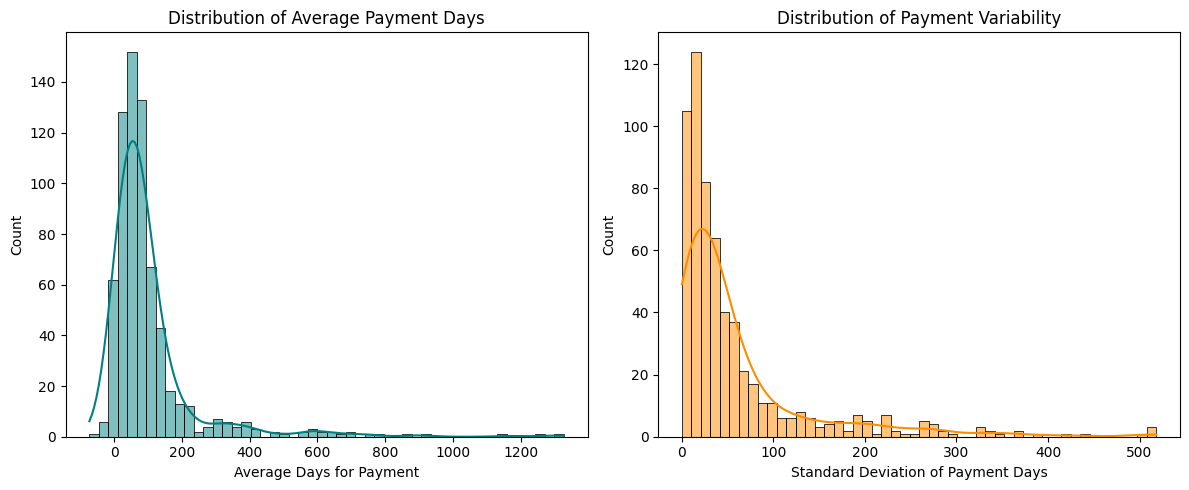

In [259]:
#Visualizing the distribution of customer payment behavior
plt.figure(figsize=(12,5))

#Histogram for Average Payment Days
plt.subplot(1,2,1)
sns.histplot(cust_seg['Avg days for payment'], bins=50, kde=True, color='teal')
plt.xlabel("Average Days for Payment")
plt.ylabel("Count")
plt.title("Distribution of Average Payment Days")

#Histogram for Standard Deviation of Payment Days
plt.subplot(1,2,2)
sns.histplot(cust_seg['Std deviation for payment'], bins=50, kde=True, color='darkorange')
plt.xlabel("Standard Deviation of Payment Days")
plt.ylabel("Count")
plt.title("Distribution of Payment Variability")

plt.tight_layout()
plt.show()


  - ***`   The distribution of both average payment days and standard deviation of payment days is highly right-skewed, indicating that while most customers tend to make payments within a shorter time frame, a few significantly delay their payments. The high variability in payment behavior among some customers suggests inconsistent payment patterns, which could be critical for risk analysis and customer segmentation. Additionally, due to the large range of values, scaling is necessary before applying machine learning models to ensure fair comparisons and prevent biases in the analysis.`***

In [260]:
#Importing necessary libraries for standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cust_seg[['Avg days for payment', 'Std deviation for payment']] = scaler.fit_transform(cust_seg[['Avg days for payment', 'Std deviation for payment']])

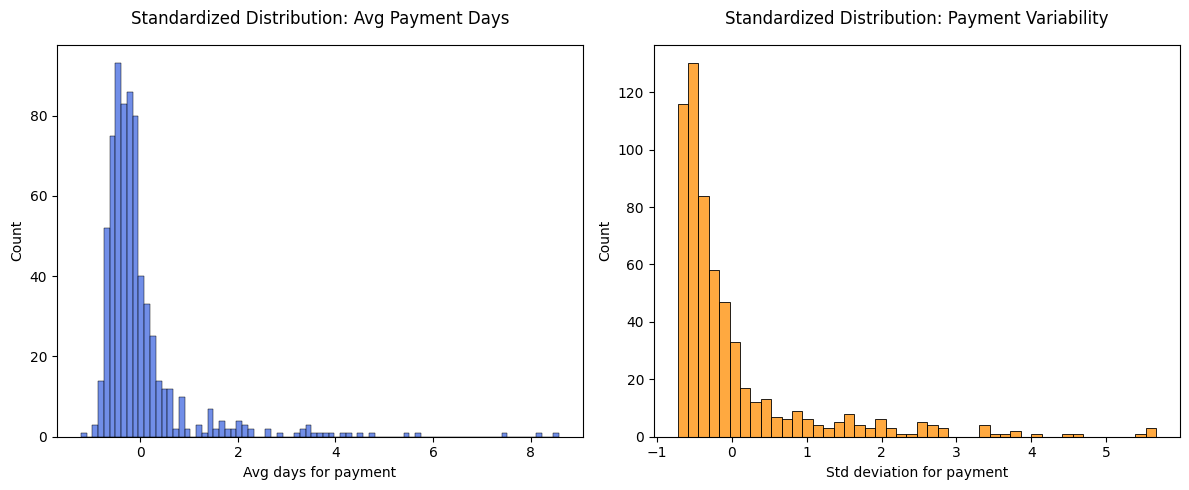

In [261]:
#Revisualizing the standardized data to check distribution
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(cust_seg['Avg days for payment'], color="royalblue")
plt.title("Standardized Distribution: Avg Payment Days", fontsize=12, pad=15)

plt.subplot(1,2,2)
sns.histplot(cust_seg['Std deviation for payment'], color="darkorange")
plt.title("Standardized Distribution: Payment Variability", fontsize=12, pad=15)

plt.tight_layout()
plt.show()

  - ***`   The data has been effectively scaled, ensuring all values fall within a normalized range. While the overall distribution pattern remains unchanged, the standardization enhances comparability, making it more suitable for clustering models. Most customers demonstrate lower average payment days with minimal variability, indicating a consistent payment behavior across transactions.`***

In [262]:
#Resetting the index for better accessibility
cust_seg.reset_index(inplace=True)

#Checking for the presence of null values
round(cust_seg.isna().sum() / len(cust_seg.index), 4)

,0
CUSTOMER_NAME,0.0000
Avg days for payment,0.0000
Std deviation for payment,0.1248


In [263]:
#Filling missing values in 'Std deviation for payment' with 0
cust_seg['Std deviation for payment'].fillna(0, inplace=True)

In [264]:
#Creating a copy of the customer segmentation data for clustering
cluster_df = cust_seg.copy()
cluster_df.head()

,CUSTOMER_NAME,Avg days for payment,Std deviation for payment
0,3D D Corp,-0.534519,-0.563303
1,6TH Corp,-0.420640,-0.626042
2,A3 D Corp,-0.387513,-0.075683
3,ABC Corp,-0.593276,-0.724119
4,ABDU Corp,-0.167009,-0.046851


In [265]:
#Removing 'CUSTOMER_NAME' as it is not needed for clustering
cluster_df.drop('CUSTOMER_NAME', axis=1, inplace=True)
cluster_df.head()

,Avg days for payment,Std deviation for payment
0,-0.534519,-0.563303
1,-0.420640,-0.626042
2,-0.387513,-0.075683
3,-0.593276,-0.724119
4,-0.167009,-0.046851


- **BUILDING K-MEANS CLUSTERING MODEL**

In [266]:
#Importing necessary libraries for clustering and evaluation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [267]:
#Applying k-means clustering with an arbitrary choice of 4 clusters
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=42)
kmeans.fit(cluster_df)
kmeans.cluster_centers_

array([[ 1.85344423,  3.33339499],
       [-0.3019069 , -0.32884213],
       [ 4.66736808,  0.44512922],
       [ 0.42465258,  0.94746544]])

- **IDENTIFYING THE OPTIMAL NUMBER OF CLUSTERS**

In [268]:
#Performing silhouette analysis for different cluster sizes
cluster_range = [2, 3, 4, 5, 6, 7, 8]

for cluster in cluster_range:

    #Initializing k-means clustering with varying cluster sizes
    kmeans = KMeans(n_clusters=cluster, max_iter=50, random_state=42)
    kmeans.fit(cluster_df)

    cluster_labels = kmeans.labels_

    #Calculating the silhouette score to evaluate clustering performance
    silhouette_avg = silhouette_score(cluster_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(cluster, silhouette_avg))

For n_clusters=2, the silhouette score is 0.7557759850933141
For n_clusters=3, the silhouette score is 0.7491797445652462
For n_clusters=4, the silhouette score is 0.6097388985555463
For n_clusters=5, the silhouette score is 0.6173540681032771
For n_clusters=6, the silhouette score is 0.3980238443004184
For n_clusters=7, the silhouette score is 0.4012628375918799
For n_clusters=8, the silhouette score is 0.41457849738976615


  - ***`   The silhouette analysis indicates that 3 clusters provide a well-balanced segmentation, ensuring distinct group separation while maintaining cluster cohesion. Increasing the number of clusters beyond 3 results in a fluctuating silhouette score, suggesting diminishing returns in segmentation quality. Choosing too many clusters may lead to over-segmentation, making interpretation more complex. Thus, selecting K=3 is optimal as it maintains a meaningful structure while effectively distinguishing customer payment behaviors.`***   

In [269]:
#Training the final K-Means model with 3 clusters
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=42)
kmeans.fit(cluster_df)

KMeans(max_iter=50, n_clusters=3, random_state=42)

In [270]:
#Retrieving the cluster labels assigned by the K-Means model
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [271]:
#Adding the cluster labels to the customer segmentation dataframe
cust_seg['cluster_id'] = kmeans.labels_

#Displaying the first few rows of the updated dataframe
cust_seg.head()

,CUSTOMER_NAME,Avg days for payment,Std deviation for payment,cluster_id
0,3D D Corp,-0.534519,-0.563303,1
1,6TH Corp,-0.420640,-0.626042,1
2,A3 D Corp,-0.387513,-0.075683,1
3,ABC Corp,-0.593276,-0.724119,1
4,ABDU Corp,-0.167009,-0.046851,1


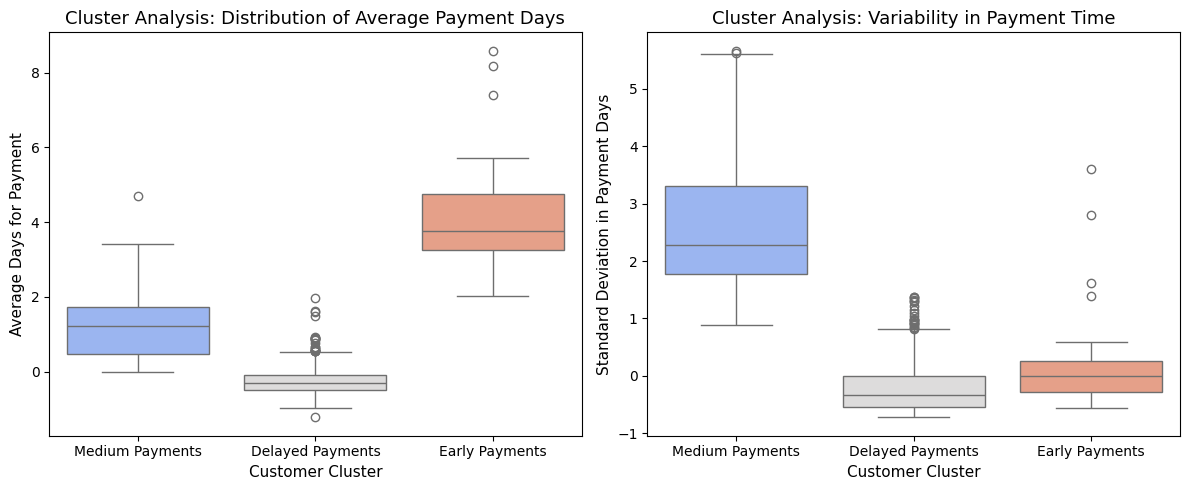

In [272]:
#Plotting box plot based on clusters
plt.figure(figsize=(12,5))

palette = "coolwarm"

#Subplot 1: Boxplot for Average Payment Days per Cluster
plt.subplot(1,2,1)
sns.boxplot(x='cluster_id', y='Avg days for payment', data=cust_seg, palette=palette)
plt.title("Cluster Analysis: Distribution of Average Payment Days", fontsize=13)
plt.xlabel("Customer Cluster", fontsize=11)
plt.ylabel("Average Days for Payment", fontsize=11)
plt.xticks([0, 1, 2], ['Medium Payments', 'Delayed Payments', 'Early Payments'])

#Subplot 2: Boxplot for Payment Variability per Cluster
plt.subplot(1,2,2)
sns.boxplot(x='cluster_id', y='Std deviation for payment', data=cust_seg, palette=palette)
plt.title("Cluster Analysis: Variability in Payment Time", fontsize=13)
plt.xlabel("Customer Cluster", fontsize=11)
plt.ylabel("Standard Deviation in Payment Days", fontsize=11)
plt.xticks([0, 1, 2], ['Medium Payments', 'Delayed Payments', 'Early Payments'])

plt.tight_layout()
plt.show()

  - ***`   Cluster 1 (Prolonged Payments): Customers take the longest to pay with moderate variability. `***
  - ***`   Cluster 2 (Early Payments): Customers pay quickly with high consistency. `***
  - ***`   Cluster 0 (Medium Payments): Customers have a balanced payment time with some variability. `***

In [273]:
#Dropping 'Avg days for payment' and 'Std deviation for payment' to prepare for merging with the open invoice dataset and assigning cluster IDs to customers.
cust_seg.drop(['Avg days for payment', 'Std deviation for payment'], axis=1, inplace=True)

In [274]:
#Making a copy of the `cust_seg` dataset for further modifications.
cust_dict = cust_seg.copy()

In [275]:
#Renaming 'CUSTOMER_NAME' to 'Customer_Name' to ensure uniform naming conventions.
cust_dict.rename(columns={'CUSTOMER_NAME':'Customer_Name'}, inplace=True)
cust_dict.head()

,Customer_Name,cluster_id
0,3D D Corp,1
1,6TH Corp,1
2,A3 D Corp,1
3,ABC Corp,1
4,ABDU Corp,1


In [276]:
#Rearranging the dataset by making 'Customer_Name' the index for easier lookups.
cust_dict.set_index('Customer_Name')

,cluster_id
Customer_Name,
3D D Corp,1
6TH Corp,1
A3 D Corp,1
ABC Corp,1
ABDU Corp,1
...,...
YOUS Corp,1
ZAHR Corp,1
ZAIN Corp,1


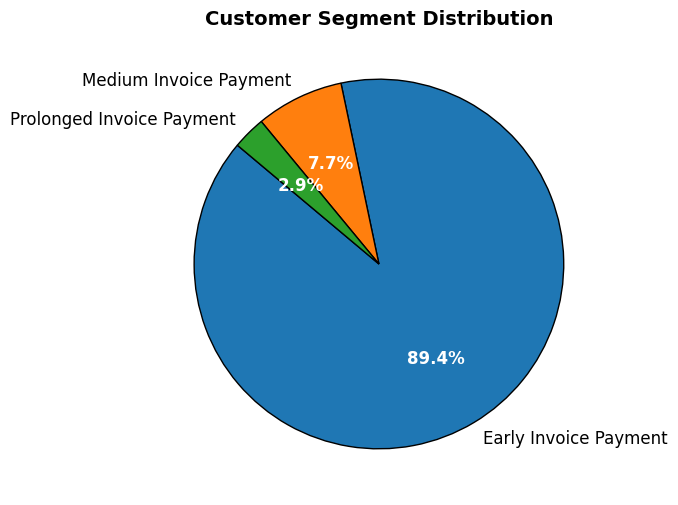

In [277]:
#Visualizing customer segment distribution
colors = ['#1F77B4', '#FF7F0E', '#2CA02C']

plt.figure(figsize=(8,6))
wedges, texts, autotexts = plt.pie(
    cust_dict.cluster_id.value_counts(normalize=True) * 100,
    labels=['Early Invoice Payment', 'Medium Invoice Payment', 'Prolonged Invoice Payment'],
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},
    textprops={'fontsize': 12, 'color': 'black'}
)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

plt.title("Customer Segment Distribution", fontsize=14, fontweight='bold')
plt.show()

  - ***`   88.7% of customers fall into the Early Invoice Payment category, indicating a strong tendency toward timely payments. `***
  - ***`   8.7% of customers belong to the Medium Invoice Payment segment, meaning they show moderate payment delays. `***
  - ***`   Only 2.6% of customers exhibit Prolonged Invoice Payment behavior, highlighting a very small portion that requires intervention. `***
  - ***`   The data suggests that most customers pay on time. `***

In [278]:
#Merging the received payment dataset with customer segmentation data
merged_df = pd.merge(rec_pay_data, cust_seg, how='inner', on='CUSTOMER_NAME')
merged_df.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,INVOICE_CURRENCY_CODE,...,PAY_TERM_60 Days from EOM,PAY_TERM_60 Days from Inv Date,PAY_TERM_90 Days from EOM,PAY_TERM_90 Days from Inv Date,PAY_TERM_Immediate Payment,INVOICE_CM,INVOICE_DM,INVOICE_INV,act_days_for_pay,cluster_id
0,WIRE,C EA Corp,37403,2021-04-20,USD,101018.63040,14200000001,2020-11-02,2020-12-30,AED,...,False,False,False,False,False,False,False,True,169,1
1,WIRE,RADW Corp,4003,2021-01-31,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,SAR,...,False,False,False,False,False,False,False,True,33,1
2,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,SAR,...,False,False,False,False,False,False,False,True,1,1
3,WIRE,FARO Corp,1409,2021-01-31,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,SAR,...,False,False,False,False,False,False,False,True,47,0
4,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,SAR,...,False,False,False,False,False,False,False,True,47,1


In [279]:
#Checking for missing values in the 'cluster_id' column
merged_df['cluster_id'].isnull().sum()

0

In [280]:
#Displaying all column names in the merged dataset
merged_df.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CURRENCY_CODE', 'USD Amount', 'INVOICE_ALLOCATED',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'default', 'month_reciept', 'month_inv_creation',
       'month_due', 'PAY_TERM_15 Days from EOM', 'PAY_TERM_30 Days from EOM',
       'PAY_TERM_30 Days from Inv Date', 'PAY_TERM_45 Days from EOM',
       'PAY_TERM_45 Days from Inv Date', 'PAY_TERM_60 Days from EOM',
       'PAY_TERM_60 Days from Inv Date', 'PAY_TERM_90 Days from EOM',
       'PAY_TERM_90 Days from Inv Date', 'PAY_TERM_Immediate Payment',
       'INVOICE_CM', 'INVOICE_DM', 'INVOICE_INV', 'act_days_for_pay',
       'cluster_id'],
      dtype='object')

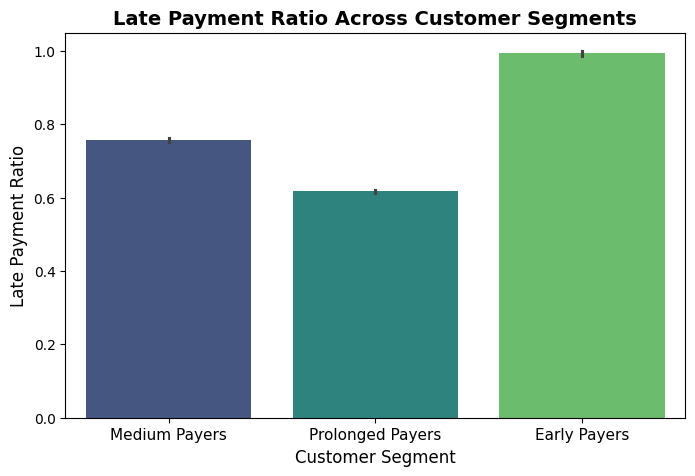

In [281]:
# Visualizing the late payment ratio across customer clusters
plt.figure(figsize=(8,5))

sns.barplot(data=merged_df, x='cluster_id', y='default', estimator=np.mean, palette='viridis')

plt.title("Late Payment Ratio Across Customer Segments", fontsize=14, fontweight='bold')
plt.xlabel("Customer Segment", fontsize=12)
plt.ylabel("Late Payment Ratio", fontsize=12)
plt.xticks(ticks=[0,1,2], labels=["Medium Payers", "Prolonged Payers", "Early Payers"], fontsize=11)

plt.show()

  - ***`   Cluster 1 has the highest late payment ratio, indicating frequent delays. `***
  - ***`   Cluster 0 shows a moderate late payment ratio, with mixed payment behavior. `***
  - ***`   Cluster 2 has the lowest late payment ratio, representing the most timely payers. `***

#### **3.2 LOGISTIC REGRESSION**
  

In [282]:
#Selecting key features for model building
reg_df = merged_df[['USD Amount','INVOICE_CREATION_DATE', 'PAY_TERM_15 Days from EOM', 'PAY_TERM_30 Days from EOM',
                    'PAY_TERM_30 Days from Inv Date', 'PAY_TERM_45 Days from EOM', 'PAY_TERM_45 Days from Inv Date',
                    'PAY_TERM_60 Days from EOM', 'PAY_TERM_60 Days from Inv Date', 'PAY_TERM_90 Days from EOM',
                    'PAY_TERM_90 Days from Inv Date', 'PAY_TERM_Immediate Payment',
                    'INVOICE_CM', 'INVOICE_DM', 'INVOICE_INV', 'cluster_id']]
reg_df.head()

,USD Amount,INVOICE_CREATION_DATE,PAY_TERM_15 Days from EOM,PAY_TERM_30 Days from EOM,PAY_TERM_30 Days from Inv Date,PAY_TERM_45 Days from EOM,PAY_TERM_45 Days from Inv Date,PAY_TERM_60 Days from EOM,PAY_TERM_60 Days from Inv Date,PAY_TERM_90 Days from EOM,PAY_TERM_90 Days from Inv Date,PAY_TERM_Immediate Payment,INVOICE_CM,INVOICE_DM,INVOICE_INV,cluster_id
0,101018.63040,2020-11-02,False,True,False,False,False,False,False,False,False,False,False,False,True,1
1,48990.21133,2020-12-29,False,False,True,False,False,False,False,False,False,False,False,False,True,1
2,41991.60971,2021-01-30,False,False,True,False,False,False,False,False,False,False,False,False,True,1
3,41991.60971,2020-12-15,False,False,True,False,False,False,False,False,False,False,False,False,True,0
4,41991.60971,2020-12-15,False,False,True,False,False,False,False,False,False,False,False,False,True,1


In [283]:
#Extracting the invoice month and removing the original invoice creation date
reg_df['Invoice_Month'] = reg_df['INVOICE_CREATION_DATE'].dt.month
reg_df.drop('INVOICE_CREATION_DATE',axis=1,inplace= True)
reg_df.head()

,USD Amount,PAY_TERM_15 Days from EOM,PAY_TERM_30 Days from EOM,PAY_TERM_30 Days from Inv Date,PAY_TERM_45 Days from EOM,PAY_TERM_45 Days from Inv Date,PAY_TERM_60 Days from EOM,PAY_TERM_60 Days from Inv Date,PAY_TERM_90 Days from EOM,PAY_TERM_90 Days from Inv Date,PAY_TERM_Immediate Payment,INVOICE_CM,INVOICE_DM,INVOICE_INV,cluster_id,Invoice_Month
0,101018.63040,False,True,False,False,False,False,False,False,False,False,False,False,True,1,11
1,48990.21133,False,False,True,False,False,False,False,False,False,False,False,False,True,1,12
2,41991.60971,False,False,True,False,False,False,False,False,False,False,False,False,True,1,1
3,41991.60971,False,False,True,False,False,False,False,False,False,False,False,False,True,0,12
4,41991.60971,False,False,True,False,False,False,False,False,False,False,False,False,True,1,12


In [284]:
#Checking the dataset dimensions
reg_df.shape

(92811, 16)

In [285]:
#Selecting relevant features from the open invoice dataset
open_reg_df = open_data[['Due Date','USD Amount', 'INV_CREATION_DATE', '15 Days from EOM', '30 Days from EOM',
                         '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM',
                         '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date', 'Immediate Payment',
                         'DM', 'INV', 'CM','AGE']]
open_reg_df.head()

,Due Date,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,AGE
1,2022-03-03,2000,2022-02-01 14:09:00,False,False,True,False,False,False,False,False,False,False,False,True,0,33
2,2022-04-23,2000,2022-03-24 17:46:00,False,False,True,False,False,False,False,False,False,False,False,True,0,-18
3,2022-01-19,2415,2022-01-05 11:49:00,False,False,False,False,False,False,False,False,False,False,False,True,0,76
4,2022-04-30,3800,2022-03-03 22:30:00,False,True,False,False,False,False,False,False,False,False,False,True,0,-25
5,2022-04-30,1264,2022-03-03 22:30:00,False,True,False,False,False,False,False,False,False,False,False,True,0,-25


In [286]:
#Extracting the invoice month and removing the invoice creation date
open_reg_df['Invoice_Month'] = open_reg_df['INV_CREATION_DATE'].dt.month
open_reg_df.drop('INV_CREATION_DATE', axis=1, inplace=True)
open_reg_df.head()

,Due Date,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,AGE,Invoice_Month
1,2022-03-03,2000,False,False,True,False,False,False,False,False,False,False,False,True,0,33,2
2,2022-04-23,2000,False,False,True,False,False,False,False,False,False,False,False,True,0,-18,3
3,2022-01-19,2415,False,False,False,False,False,False,False,False,False,False,False,True,0,76,1
4,2022-04-30,3800,False,True,False,False,False,False,False,False,False,False,False,True,0,-25,3
5,2022-04-30,1264,False,True,False,False,False,False,False,False,False,False,False,True,0,-25,3


In [287]:
#Extracting the due month and removing the due date column
open_reg_df['Due_Month'] = open_reg_df['Due Date'].dt.month
open_reg_df.drop('Due Date', axis=1, inplace=True)
open_reg_df.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,AGE,Invoice_Month,Due_Month
1,2000,False,False,True,False,False,False,False,False,False,False,False,True,0,33,2,3
2,2000,False,False,True,False,False,False,False,False,False,False,False,True,0,-18,3,4
3,2415,False,False,False,False,False,False,False,False,False,False,False,True,0,76,1,1
4,3800,False,True,False,False,False,False,False,False,False,False,False,True,0,-25,3,4
5,1264,False,True,False,False,False,False,False,False,False,False,False,True,0,-25,3,4


In [288]:
#Checking column names in the processed dataset for model building
reg_df.columns

Index(['USD Amount', 'PAY_TERM_15 Days from EOM', 'PAY_TERM_30 Days from EOM',
       'PAY_TERM_30 Days from Inv Date', 'PAY_TERM_45 Days from EOM',
       'PAY_TERM_45 Days from Inv Date', 'PAY_TERM_60 Days from EOM',
       'PAY_TERM_60 Days from Inv Date', 'PAY_TERM_90 Days from EOM',
       'PAY_TERM_90 Days from Inv Date', 'PAY_TERM_Immediate Payment',
       'INVOICE_CM', 'INVOICE_DM', 'INVOICE_INV', 'cluster_id',
       'Invoice_Month'],
      dtype='object')

In [289]:
#Checking column names in the processed open invoice dataset
open_reg_df.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'CM', 'AGE',
       'Invoice_Month', 'Due_Month'],
      dtype='object')

In [303]:
bool_cols = list(reg_df.select_dtypes(include=['bool']).columns)
print(bool_cols)
reg_df[bool_cols] = reg_df[bool_cols].astype('int')


['PAY_TERM_15 Days from EOM', 'PAY_TERM_30 Days from EOM', 'PAY_TERM_30 Days from Inv Date', 'PAY_TERM_45 Days from EOM', 'PAY_TERM_45 Days from Inv Date', 'PAY_TERM_60 Days from EOM', 'PAY_TERM_60 Days from Inv Date', 'PAY_TERM_90 Days from EOM', 'PAY_TERM_90 Days from Inv Date', 'PAY_TERM_Immediate Payment', 'INVOICE_CM', 'INVOICE_DM', 'INVOICE_INV']


In [305]:
reg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92811 entries, 0 to 92810
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   USD Amount                      92811 non-null  float64
 1   PAY_TERM_15 Days from EOM       92811 non-null  int64  
 2   PAY_TERM_30 Days from EOM       92811 non-null  int64  
 3   PAY_TERM_30 Days from Inv Date  92811 non-null  int64  
 4   PAY_TERM_45 Days from EOM       92811 non-null  int64  
 5   PAY_TERM_45 Days from Inv Date  92811 non-null  int64  
 6   PAY_TERM_60 Days from EOM       92811 non-null  int64  
 7   PAY_TERM_60 Days from Inv Date  92811 non-null  int64  
 8   PAY_TERM_90 Days from EOM       92811 non-null  int64  
 9   PAY_TERM_90 Days from Inv Date  92811 non-null  int64  
 10  PAY_TERM_Immediate Payment      92811 non-null  int64  
 11  INVOICE_CM                      92811 non-null  int64  
 12  INVOICE_DM                      

- **TRAIN-TEST SPLIT**

In [306]:
#Defining Feature Variables (X)
X = reg_df.copy()
X.head()

,USD Amount,PAY_TERM_15 Days from EOM,PAY_TERM_30 Days from EOM,PAY_TERM_30 Days from Inv Date,PAY_TERM_45 Days from EOM,PAY_TERM_45 Days from Inv Date,PAY_TERM_60 Days from EOM,PAY_TERM_60 Days from Inv Date,PAY_TERM_90 Days from EOM,PAY_TERM_90 Days from Inv Date,PAY_TERM_Immediate Payment,INVOICE_CM,INVOICE_DM,INVOICE_INV,cluster_id,Invoice_Month
0,101018.63040,0,1,0,0,0,0,0,0,0,0,0,0,1,1,11
1,48990.21133,0,0,1,0,0,0,0,0,0,0,0,0,1,1,12
2,41991.60971,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1
3,41991.60971,0,0,1,0,0,0,0,0,0,0,0,0,1,0,12
4,41991.60971,0,0,1,0,0,0,0,0,0,0,0,0,1,1,12


In [307]:
#Defining Target Variable (y)
y = merged_df['default']
y.head()

,default
0,1
1,1
2,0
3,1
4,1


In [309]:
#Splitting Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)
X_train.head()

,USD Amount,PAY_TERM_15 Days from EOM,PAY_TERM_30 Days from EOM,PAY_TERM_30 Days from Inv Date,PAY_TERM_45 Days from EOM,PAY_TERM_45 Days from Inv Date,PAY_TERM_60 Days from EOM,PAY_TERM_60 Days from Inv Date,PAY_TERM_90 Days from EOM,PAY_TERM_90 Days from Inv Date,PAY_TERM_Immediate Payment,INVOICE_CM,INVOICE_DM,INVOICE_INV,cluster_id,Invoice_Month
52625,10110.77468,0,1,0,0,0,0,0,0,0,0,0,0,1,1,5
29115,20469.08000,0,0,0,0,0,0,1,0,0,0,0,0,1,1,4
80920,19816.98173,0,0,0,0,0,0,0,1,0,0,0,1,0,1,12
55019,655652.78150,0,0,0,0,0,1,0,0,0,0,0,0,1,1,12
82266,268512.93000,0,0,0,0,0,0,1,0,0,0,0,0,1,1,12


- **FEATURE SCALING**

In [310]:
#Checking shape
X_train.shape

(64967, 16)

In [311]:
#Scaling USD Amount
scaler = StandardScaler()
X_train['USD Amount'] = scaler.fit_transform(X_train[['USD Amount']])
X_train.head()

,USD Amount,PAY_TERM_15 Days from EOM,PAY_TERM_30 Days from EOM,PAY_TERM_30 Days from Inv Date,PAY_TERM_45 Days from EOM,PAY_TERM_45 Days from Inv Date,PAY_TERM_60 Days from EOM,PAY_TERM_60 Days from Inv Date,PAY_TERM_90 Days from EOM,PAY_TERM_90 Days from Inv Date,PAY_TERM_Immediate Payment,INVOICE_CM,INVOICE_DM,INVOICE_INV,cluster_id,Invoice_Month
52625,-0.553331,0,1,0,0,0,0,0,0,0,0,0,0,1,1,5
29115,-0.542467,0,0,0,0,0,0,1,0,0,0,0,0,1,1,4
80920,-0.543151,0,0,0,0,0,0,0,1,0,0,0,1,0,1,12
55019,0.123734,0,0,0,0,0,1,0,0,0,0,0,0,1,1,12
82266,-0.282310,0,0,0,0,0,0,1,0,0,0,0,0,1,1,12


In [312]:
#Summary Statistics of X_train
X_train.describe()

,USD Amount,PAY_TERM_15 Days from EOM,PAY_TERM_30 Days from EOM,PAY_TERM_30 Days from Inv Date,PAY_TERM_45 Days from EOM,PAY_TERM_45 Days from Inv Date,PAY_TERM_60 Days from EOM,PAY_TERM_60 Days from Inv Date,PAY_TERM_90 Days from EOM,PAY_TERM_90 Days from Inv Date,PAY_TERM_Immediate Payment,INVOICE_CM,INVOICE_DM,INVOICE_INV,cluster_id,Invoice_Month
count,6.496700e+04,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000
mean,-4.702901e-18,0.080487,0.121154,0.151369,0.042052,0.037973,0.135115,0.211892,0.042314,0.024289,0.112057,0.053027,0.006142,0.940831,0.731679,5.455354
std,1.000008e+00,0.272048,0.326308,0.358411,0.200710,0.191133,0.341849,0.408652,0.201306,0.153947,0.315439,0.224089,0.078128,0.235942,0.448407,4.073434
min,-5.639339e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,-5.215070e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,-3.638550e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000
75%,6.495879e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,10.000000
max,1.081571e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,12.000000


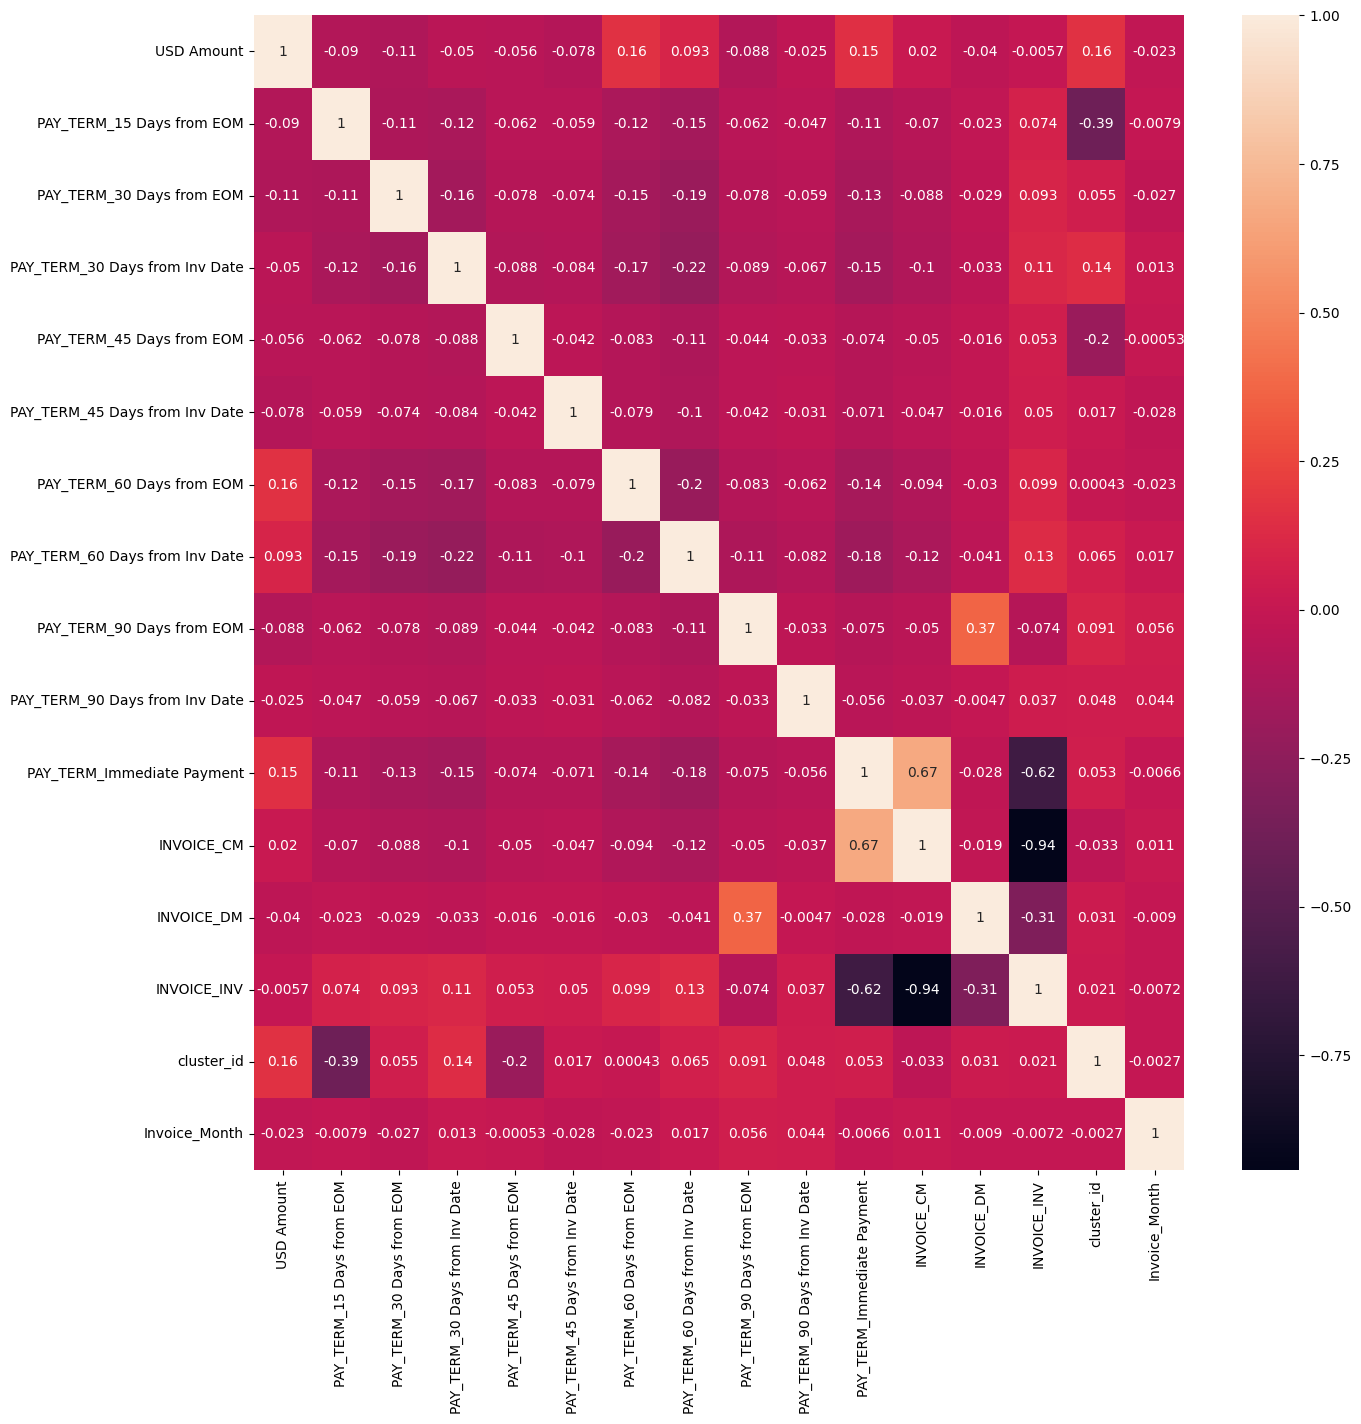

In [313]:
#Generating Heatmap for X_train
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

- **DROPPING HIGHLY CORRELATED FEATURES: CM & INV, INV & IMMEDIATE PAYMENT, DM & 90 DAYS FROM EOM**

In [314]:
#Removing Highly Correlated Features (CM, INV, DM) from Training and Testing Data
X_train.drop(['INVOICE_CM', 'INVOICE_INV', 'INVOICE_DM'], axis=1, inplace=True)
X_test.drop(['INVOICE_CM', 'INVOICE_INV', 'INVOICE_DM'], axis=1, inplace=True)

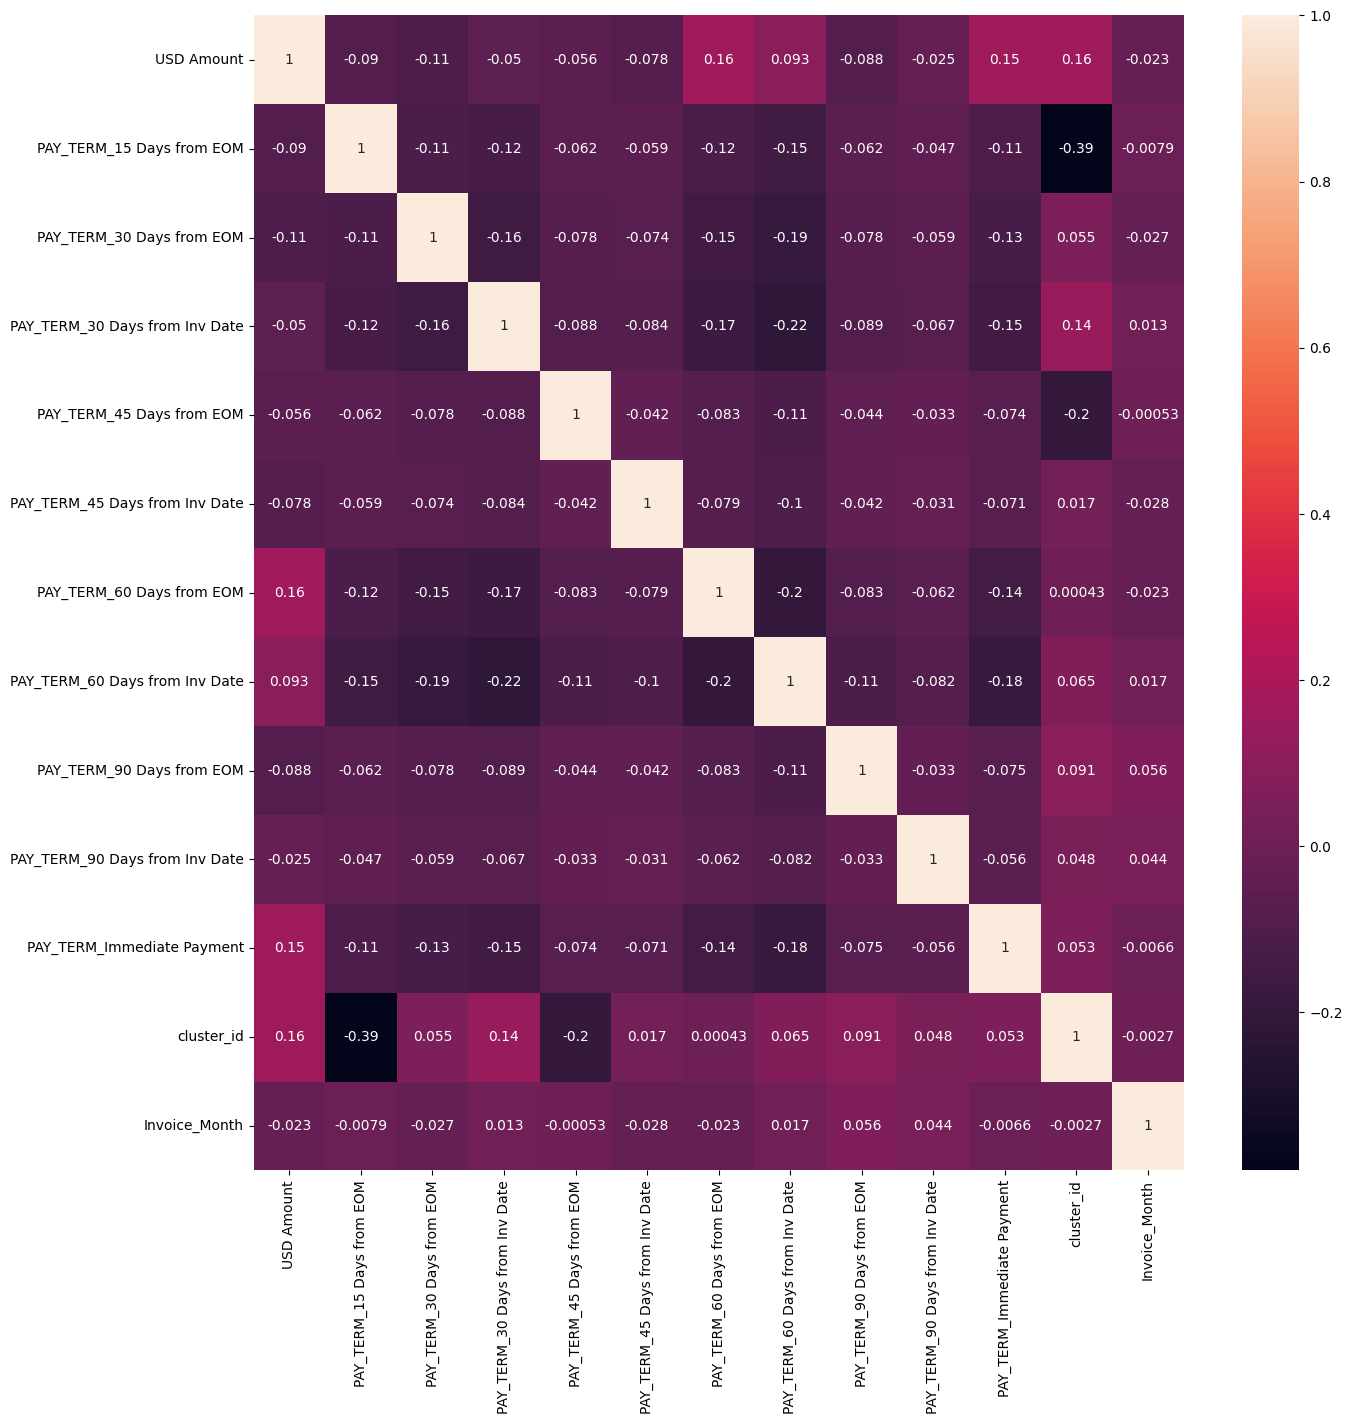

In [315]:
#Replotting Heatmap for X_train to Verify Multicollinearity Reduction
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

- **DATA IS NOW FREE FROM HIGH MULTICOLLINEARITY, PROCEEDING TO MODEL BUILDING**



- **MODEL BUILDING**

In [316]:
#Importing Library for Logistic Regression Model
import statsmodels.api as sm

In [317]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64967 entries, 52625 to 15795
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   USD Amount                      64967 non-null  float64
 1   PAY_TERM_15 Days from EOM       64967 non-null  int64  
 2   PAY_TERM_30 Days from EOM       64967 non-null  int64  
 3   PAY_TERM_30 Days from Inv Date  64967 non-null  int64  
 4   PAY_TERM_45 Days from EOM       64967 non-null  int64  
 5   PAY_TERM_45 Days from Inv Date  64967 non-null  int64  
 6   PAY_TERM_60 Days from EOM       64967 non-null  int64  
 7   PAY_TERM_60 Days from Inv Date  64967 non-null  int64  
 8   PAY_TERM_90 Days from EOM       64967 non-null  int64  
 9   PAY_TERM_90 Days from Inv Date  64967 non-null  int64  
 10  PAY_TERM_Immediate Payment      64967 non-null  int64  
 11  cluster_id                      64967 non-null  int32  
 12  Invoice_Month                   6

In [318]:
#Fitting a Generalized Linear Model (GLM) Using Binomial Family

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res=logm1.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                64967
Model:                            GLM   Df Residuals:                    64953
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -30146.
Date:                Tue, 04 Feb 2025   Deviance:                       60292.
Time:                        06:18:51   Pearson chi2:                 6.29e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3018
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

- **CHECKING VIF**

In [319]:
#Creating a DataFrame to Store Feature Variables and Their VIF Values
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,cluster_id,4.08
12,Invoice_Month,2.66
7,PAY_TERM_60 Days from Inv Date,2.01
3,PAY_TERM_30 Days from Inv Date,1.85
2,PAY_TERM_30 Days from EOM,1.58
6,PAY_TERM_60 Days from EOM,1.57
10,PAY_TERM_Immediate Payment,1.54
8,PAY_TERM_90 Days from EOM,1.29
5,PAY_TERM_45 Days from Inv Date,1.17
9,PAY_TERM_90 Days from Inv Date,1.15


  - ***`   Both the p-value and VIF fall within acceptable limits, indicating the model is suitable for proceeding.`***

In [320]:
#Generating Predicted Values for the Training Set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

,0
52625,0.209960
29115,0.673845
80920,0.763726
55019,0.374863
82266,0.814366
16093,0.991638
54916,0.374863
15532,0.207595
2618,0.810537
79771,0.624812


In [321]:
#Reshaping the Predicted Values Array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20995955, 0.6738448 , 0.76372636, 0.37486271, 0.81436605,
       0.99163782, 0.37486271, 0.20759496, 0.8105375 , 0.62481234])

In [322]:
#Creating a DataFrame for Storing Predicted Probabilities
y_pred = pd.DataFrame({'default':y_train.values, 'default_pred':y_train_pred})
y_pred.head()

,default,default_pred
0,0,0.209960
1,0,0.673845
2,1,0.763726
3,1,0.374863
4,0,0.814366


- **ADDING A NEW COLUMN 'FINAL_PRED' BASED ON A 0.5 THRESHOLD FOR CLASSIFICATION**

In [323]:
#Applying a 0.5 Cutoff to Make Final Predictions
y_pred['logreg_pred'] = y_pred['default_pred'].map(lambda x:1 if x>0.5 else 0)
y_pred.head()

,default,default_pred,logreg_pred
0,0,0.209960,0
1,0,0.673845,1
2,1,0.763726,1
3,1,0.374863,0
4,0,0.814366,1


In [324]:
#Importing Required Libraries for Model Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from statsmodels.tools.tools import add_constant

In [325]:
#Generating the Confusion Matrix
confusion = confusion_matrix(y_pred.default, y_pred.logreg_pred)
confusion

array([[12815,  9534],
       [ 4453, 38165]])

In [326]:
#Calculating Model Accuracy
print(accuracy_score(y_pred.default, y_pred.logreg_pred))

0.7847060815490942


- ***`  The model achieves an accuracy of 78.3% on the training dataset.`***

In [327]:
#Extracting True Positives, True Negatives, False Positives, and False Negatives
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [328]:
#Evaluating Model Sensitivity (Recall)
sensitivity = TP / float(TP+FN)
sensitivity

0.8955136327373411

In [329]:
#Calculating Model Specificity
specificity = TN / float(TN+FP)
specificity

0.5734037317105911

In [330]:
#Computing the False Positive Rate (FPR)
print(FP/ float(TN+FP))

0.42659626828940894


In [331]:
#Determining Positive Predictive Value (Precision)
print (TP / float(TP+FP))

0.8001215958405836


In [332]:
#Computing Negative Predictive Value (NPV)
print (TN / float(TN+ FN))

0.7421241602965022


- **IDENTIFYING THE OPTIMAL THRESHOLD FOR CLASSIFICATION**

In [333]:
#Evaluating multiple probability thresholds
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    y_pred[f'y_pred_{i}'] = y_pred['default_pred'].apply(lambda x : 1 if x > i else 0)
y_pred

,default,default_pred,logreg_pred,y_pred_0.1,y_pred_0.2,y_pred_0.3,y_pred_0.4,y_pred_0.5,y_pred_0.6,y_pred_0.7,y_pred_0.8,y_pred_0.9
0,0,0.209960,0,1,1,0,0,0,0,0,0,0
1,0,0.673845,1,1,1,1,1,1,1,0,0,0
2,1,0.763726,1,1,1,1,1,1,1,1,0,0
3,1,0.374863,0,1,1,1,0,0,0,0,0,0
4,0,0.814366,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64962,0,0.727069,1,1,1,1,1,1,1,1,0,0
64963,1,0.173788,0,1,0,0,0,0,0,0,0,0
64964,1,0.906623,1,1,1,1,1,1,1,1,1,1
64965,1,0.910813,1,1,1,1,1,1,1,1,1,1


In [334]:
#Computing accuracy, sensitivity, and specificity for different probability cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_pred.default, y_pred[f'y_pred_{i}'])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i, accuracy, sensivity, specificity]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.1   0.1  0.655995  1.000000  0.000000
0.2   0.2  0.728924  0.976090  0.257595
0.3   0.3  0.767682  0.947745  0.424314
0.4   0.4  0.782551  0.911047  0.537518
0.5   0.5  0.784706  0.895514  0.573404
0.6   0.6  0.774039  0.864142  0.602219
0.7   0.7  0.730294  0.713173  0.762942
0.8   0.8  0.648422  0.498052  0.935165
0.9   0.9  0.540367  0.305364  0.988501


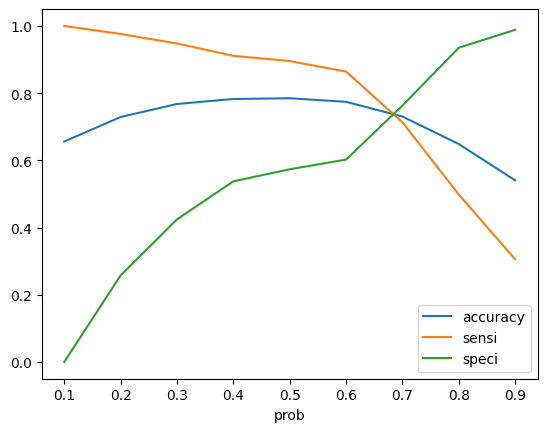

In [335]:
#Visualizing accuracy, sensitivity, and specificity across probability thresholds
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

  - ***`   Based on the precision-recall curve, a threshold of 0.67 is identified as the optimal cutoff probability for classification.`***

In [336]:
#Assigning predictions based on a 0.6 probability threshold
y_pred['final_predicted'] = y_pred.default_pred.map( lambda x: 1 if x > 0.6 else 0)

y_pred.head()

,default,default_pred,logreg_pred,y_pred_0.1,y_pred_0.2,y_pred_0.3,y_pred_0.4,y_pred_0.5,y_pred_0.6,y_pred_0.7,y_pred_0.8,y_pred_0.9,final_predicted
0,0,0.209960,0,1,1,0,0,0,0,0,0,0,0
1,0,0.673845,1,1,1,1,1,1,1,0,0,0,1
2,1,0.763726,1,1,1,1,1,1,1,1,0,0,1
3,1,0.374863,0,1,1,1,0,0,0,0,0,0,0
4,0,0.814366,1,1,1,1,1,1,1,1,1,0,1


In [337]:
#Assessing the overall model accuracy
accuracy_score(y_pred.default, y_pred.final_predicted)

0.7740391275570674

In [338]:
#Computing Precision Score
precision_score(y_pred.default, y_pred.final_predicted)

0.8055470493022442

In [339]:
#Calculating Recall Score
recall_score(y_pred.default, y_pred.final_predicted)

0.8641419118682246

In [340]:
#Generating Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_pred.default, y_pred.default_pred)

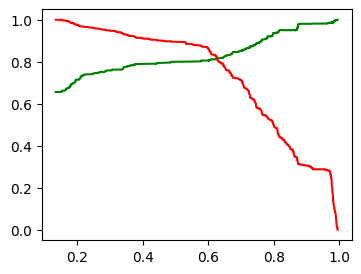

In [341]:
plt.figure(figsize=(4,3))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

  - ***`   Based on the Precision-Recall trade-off, the optimal cutoff was identified between 0.6 and 0.7. Therefore, 0.6 is selected as the final threshold for predictions.`***

- **ROC CURVE**

In [342]:
#Importing necessary libraries for ROC curve analysis
from sklearn.metrics import roc_auc_score,roc_curve

In [343]:
#Function to plot the ROC curve and calculate AUC score
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [344]:
#Computing False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_pred.default,y_pred.default_pred,drop_intermediate = False)

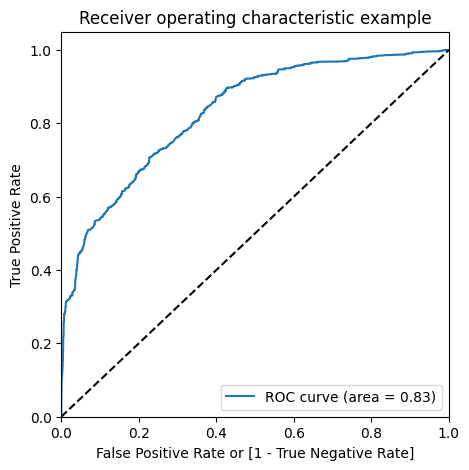

In [345]:
#Plotting the ROC curve for model evaluation
draw_roc(y_pred.default,y_pred.default_pred)

  - ***`AUC = 0.83, indicating a strong model performance in distinguishing between classes.`***

- **MAKING PREDICTIONS -  TEST SET**

In [346]:
#Scaling the numerical columns in the test set
X_test['USD Amount'] = pd.to_numeric(X_test['USD Amount'], errors='coerce')
X_test['USD Amount']= scaler.transform(X_test[['USD Amount']])
X_test.head()

,USD Amount,PAY_TERM_15 Days from EOM,PAY_TERM_30 Days from EOM,PAY_TERM_30 Days from Inv Date,PAY_TERM_45 Days from EOM,PAY_TERM_45 Days from Inv Date,PAY_TERM_60 Days from EOM,PAY_TERM_60 Days from Inv Date,PAY_TERM_90 Days from EOM,PAY_TERM_90 Days from Inv Date,PAY_TERM_Immediate Payment,cluster_id,Invoice_Month
12743,-0.545664,0,0,0,0,0,1,0,0,0,0,1,3
75338,-0.468936,0,0,0,0,0,0,1,0,0,0,0,8
39614,-0.391925,0,0,0,0,0,0,0,0,0,1,1,5
52529,-0.561789,0,1,0,0,0,0,0,0,0,0,1,5
47001,0.565237,0,1,0,0,0,0,0,0,0,0,0,4


In [347]:
#Adding a constant term to the test set
X_test_sm = sm.add_constant(X_test)

In [348]:
X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27844 entries, 12743 to 22143
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   const                           27844 non-null  float64
 1   USD Amount                      27844 non-null  float64
 2   PAY_TERM_15 Days from EOM       27844 non-null  int64  
 3   PAY_TERM_30 Days from EOM       27844 non-null  int64  
 4   PAY_TERM_30 Days from Inv Date  27844 non-null  int64  
 5   PAY_TERM_45 Days from EOM       27844 non-null  int64  
 6   PAY_TERM_45 Days from Inv Date  27844 non-null  int64  
 7   PAY_TERM_60 Days from EOM       27844 non-null  int64  
 8   PAY_TERM_60 Days from Inv Date  27844 non-null  int64  
 9   PAY_TERM_90 Days from EOM       27844 non-null  int64  
 10  PAY_TERM_90 Days from Inv Date  27844 non-null  int64  
 11  PAY_TERM_Immediate Payment      27844 non-null  int64  
 12  cluster_id                      2

In [349]:
#Generating predictions on the test dataset
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

,0
12743,0.206578
75338,0.823595
39614,0.983783
52529,0.210007
47001,0.264681
90315,0.153713
28144,0.860252
29929,0.703567
80190,0.745296
1736,0.796665


In [350]:
#Converting predicted probabilities into a DataFrame
y_pred_1 = pd.DataFrame(y_test_pred)

In [351]:
#Converting the actual test labels (y_test) into a DataFrame
y_test_df = pd.DataFrame(y_test)

In [352]:
#Setting 'CustID' as the index for the test dataset
y_test_df['CustID'] = y_test_df.index

In [353]:
#Displaying the first few rows of the formatted test set predictions
y_test_df.head()

,default,CustID
12743,0,12743
75338,1,75338
39614,1,39614
52529,0,52529
47001,0,47001


In [354]:
#Removing index from both DataFrames to facilitate side-by-side merging
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [355]:
#Merging y_test_df and y_pred_1 into a single DataFrame
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [356]:
#Displaying the first few rows of the merged predictions DataFrame
y_pred_final.head()

,default,CustID,0
0,0,12743,0.206578
1,1,75338,0.823595
2,1,39614,0.983783
3,0,52529,0.210007
4,0,47001,0.264681


In [357]:
#Renaming columns for better clarity
y_pred_final= y_pred_final.rename(columns={ 0 : 'Delay_Prob','target':'Delay'})

In [358]:
#Viewing the updated structure of y_pred_final
y_pred_final.head()

,default,CustID,Delay_Prob
0,0,12743,0.206578
1,1,75338,0.823595
2,1,39614,0.983783
3,0,52529,0.210007
4,0,47001,0.264681


In [359]:
#Generating final predictions on the test set using a 0.6 probability threshold
y_pred_final['final_predicted'] = y_pred_final.Delay_Prob.map(lambda x: 1 if x >= 0.6 else 0)

In [360]:
y_pred_final.head()

,default,CustID,Delay_Prob,final_predicted
0,0,12743,0.206578,0
1,1,75338,0.823595,1
2,1,39614,0.983783,1
3,0,52529,0.210007,0
4,0,47001,0.264681,0


In [361]:
#Evaluating the overall accuracy of the model on the test dataset
accuracy_score(y_pred_final.default, y_pred_final.final_predicted)

0.7758583536848154

In [362]:
#Calculating Precision Score
precision_score(y_pred_final.default, y_pred_final.final_predicted)

0.8077275971046998

In [363]:
#Computing Recall Score
recall_score(y_pred.default, y_pred.final_predicted)

0.8641419118682246

  - ***`   Model performs consistently with train and test accuracy both around 77.5%`***

#### **3.3 RANDOM FOREST MODEL**
  

In [364]:
## Importing necessary libraries for Random Forest modeling and evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [365]:
#Displaying the column names of the dataset
reg_df.columns

Index(['USD Amount', 'PAY_TERM_15 Days from EOM', 'PAY_TERM_30 Days from EOM',
       'PAY_TERM_30 Days from Inv Date', 'PAY_TERM_45 Days from EOM',
       'PAY_TERM_45 Days from Inv Date', 'PAY_TERM_60 Days from EOM',
       'PAY_TERM_60 Days from Inv Date', 'PAY_TERM_90 Days from EOM',
       'PAY_TERM_90 Days from Inv Date', 'PAY_TERM_Immediate Payment',
       'INVOICE_CM', 'INVOICE_DM', 'INVOICE_INV', 'cluster_id',
       'Invoice_Month'],
      dtype='object')

In [366]:
#Defining feature variables (X) and target variable (y)
X= reg_df
y= merged_df['default']

In [367]:
#Splitting the dataset into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.3, random_state=42)

In [368]:
#Building a basic Random Forest model to evaluate initial accuracy
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(random_state=42)

In [369]:
#Generating predictions from the base Random Forest model
y_train_pred_rf = rf.predict(X_train_rf)

In [370]:
#Checking accuracy and classification report
accuracy = accuracy_score(y_train_rf, y_train_pred_rf)
print(classification_report(y_train_rf, y_train_pred_rf))
print("Accuracy is : ", accuracy)

              precision    recall  f1-score   support

           0       0.96      0.91      0.94     22349
           1       0.96      0.98      0.97     42618

    accuracy                           0.96     64967
   macro avg       0.96      0.95      0.95     64967
weighted avg       0.96      0.96      0.96     64967

Accuracy is :  0.9580864131020365


In [371]:
#Performing cross-validation to assess model stability and detect overfitting

rf_cv = RandomForestClassifier(random_state=42)

#Evaluating model performance using cross-validation with recall as the scoring metric
scores = cross_val_score(rf_cv, X_train_rf, y_train_rf, cv=5, scoring= 'recall')

#Calculating the mean and standard deviation of the cross-validation recall scores
mean_score = scores.mean()
std_score = scores.std()

#Displaying the mean and standard deviation of cross-validation scores
print("Mean score:", mean_score)
print("Standard deviation:", std_score)

Mean score: 0.9520624266036315
Standard deviation: 0.0016240232566768651


In [372]:
#Generating predictions for the test dataset using the trained model
y_test_pred_rf = rf.predict(X_test_rf)

In [373]:
#Evaluating the model's predictive performance on test data using accuracy and classification metrics
accuracy = accuracy_score(y_test_rf, y_test_pred_rf)
print(classification_report(y_test_rf, y_test_pred_rf))
print("Accuracy is : ", accuracy)

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      9529
           1       0.93      0.96      0.94     18315

    accuracy                           0.92     27844
   macro avg       0.92      0.91      0.91     27844
weighted avg       0.92      0.92      0.92     27844

Accuracy is :  0.921850308863669


- **HYPERPARAMETER TUNING TO OPTIMIZE MODEL PERFORMANCE**

In [375]:
#Performing Grid Search for hyperparameter tuning to optimize Random Forest model
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid=param_grid, scoring='f1', cv=5, n_jobs= -1)

grid_search.fit(X_train_rf, y_train_rf)


print("Best hyperparameters:", grid_search.best_params_)
print("Best f1 score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred_cv_rf = best_rf.predict(X_train_rf)

print(classification_report(y_train_rf, y_pred_cv_rf))

Best hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best f1 score: 0.9393552098689479
              precision    recall  f1-score   support

           0       0.96      0.91      0.94     22349
           1       0.95      0.98      0.97     42618

    accuracy                           0.96     64967
   macro avg       0.96      0.95      0.95     64967
weighted avg       0.96      0.96      0.96     64967



In [376]:
#Evaluating model performance on the test dataset

y_pred_test_cv = best_rf.predict(X_test_rf)

print(classification_report(y_test_rf,y_pred_test_cv))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      9529
           1       0.93      0.96      0.94     18315

    accuracy                           0.92     27844
   macro avg       0.92      0.91      0.91     27844
weighted avg       0.92      0.92      0.92     27844



  - ***`   The classification report indicates that the F1-score for training (0.96) and test (0.92) is high, confirming a well-performing model. Proceeding with this as the final model for predictions.`***

- **ANALYZING FEATURE IMPORTANCE IN THE RANDOM FOREST MODEL**

In [377]:
importance = best_rf.feature_importances_
sorted_idx = importance.argsort()[::-1]

#Print feature ranking
print("Feature ranking:")
for i, idx in enumerate(sorted_idx):
    print(f"{i+1}. {X.columns[idx]} ({importance[idx]:.3f})")

Feature ranking:
1. USD Amount (0.490)
2. Invoice_Month (0.130)
3. PAY_TERM_30 Days from EOM (0.111)
4. PAY_TERM_60 Days from EOM (0.109)
5. PAY_TERM_Immediate Payment (0.044)
6. PAY_TERM_15 Days from EOM (0.028)
7. cluster_id (0.027)
8. PAY_TERM_60 Days from Inv Date (0.014)
9. PAY_TERM_30 Days from Inv Date (0.012)
10. PAY_TERM_90 Days from Inv Date (0.007)
11. PAY_TERM_90 Days from EOM (0.006)
12. INVOICE_INV (0.005)
13. INVOICE_CM (0.005)
14. PAY_TERM_45 Days from EOM (0.005)
15. PAY_TERM_45 Days from Inv Date (0.004)
16. INVOICE_DM (0.001)


- **PREPARING OPEN INVOICE DATASET FOR PREDICTIONS**

  - ***`   In the open invoice dataset, the 'AGE' column represents the difference between the Transaction Date and AS_OF_DATE. `***
    - ***`   A positive AGE value indicates that the payment is already overdue, eliminating the need for prediction. `***
    - ***`   A negative AGE value signifies that the due date has not yet passed, requiring the model to assess the likelihood of delayed payment. `***

  - ***`   This ensures that predictions are made only for invoices that are still within their payment window. `***

In [ ]:
#Selecting records with negative AGE for prediction
open_reg_df_age = open_data[open_data['AGE'] < 0]
open_reg_df_age.head()

In [ ]:
#Merging customer cluster data into open invoice dataset
open_reg_df_age = pd.merge(open_reg_df_age, cust_dict, how='left', on='Customer_Name')

In [ ]:
#Checking null value percentages
round(open_reg_df_age.isna().sum()/len(open_reg_df_age.index), 4)

  - ***`   The cluster_id column has 2.7% missing values, likely due to new customers not present in the received payment data. Dropping these for accurate model predictions. `***

In [ ]:
#Removing rows with missing cluster_id values
open_reg_df_age.dropna(axis=0, inplace=True)

In [ ]:
#Verifying dataset shape after dropping null values
open_reg_df_age.shape

In [ ]:
#Previewing the first few rows
open_reg_df_age.head()

In [ ]:
#Displaying dataset information
open_reg_df_age.info()

In [ ]:
#Converting cluster_id column to integer format
open_reg_df_age['cluster_id'] = open_reg_df_age['cluster_id'].astype('Int64')

In [ ]:
#Verifying dataset after converting cluster_id
open_reg_df_age.head()

In [ ]:
#Creating a copy of open_reg_df_age for model prediction
open_reg_df_final = open_reg_df_age.copy()

In [ ]:
#Dropping Customer_Name and AGE columns
open_reg_df_final.drop(['Customer_Name', 'AGE'], axis=1, inplace=True)

In [ ]:
#Extracting invoice month from INV_CREATION_DATE
open_reg_df_final['Invoice_Month'] = open_reg_df_final['INV_CREATION_DATE'].dt.month # Extracting Month

In [ ]:
#Removing Due_Date and INV_CREATION_DATE columns
open_reg_df_final.drop(['Due Date','INV_CREATION_DATE'], axis= 1, inplace= True)

In [ ]:
#Checking final dataset columns before prediction
open_reg_df_final.columns

In [ ]:
# Renaming columns to match training dataset
open_reg_df_final.rename(columns={
    '15 Days from EOM': 'PAY_TERM_15 Days from EOM',
    '30 Days from EOM': 'PAY_TERM_30 Days from EOM',
    '30 Days from Inv Date': 'PAY_TERM_30 Days from Inv Date',
    '45 Days from EOM': 'PAY_TERM_45 Days from EOM',
    '45 Days from Inv Date': 'PAY_TERM_45 Days from Inv Date',
    '60 Days from EOM': 'PAY_TERM_60 Days from EOM',
    '60 Days from Inv Date': 'PAY_TERM_60 Days from Inv Date',
    '90 Days from EOM': 'PAY_TERM_90 Days from EOM',
    '90 Days from Inv Date': 'PAY_TERM_90 Days from Inv Date',
    'Immediate Payment': 'PAY_TERM_Immediate Payment',
    'CM': 'INVOICE_CM',
    'DM': 'INVOICE_DM',
    'INV': 'INVOICE_INV'
}, inplace=True)


In [ ]:
open_reg_df_final = open_reg_df_final[X_train_rf.columns]

- **FINAL PREDICTION**

In [ ]:
#Generating predictions for open invoices
y_open_invoices= best_rf.predict_proba(open_reg_df_final)[:,1]

y_open_invoices

In [ ]:
#Adding predicted values to the dataset
open_reg_df_age['Pred_rf'] = y_open_invoices
open_reg_df_age.head()

In [ ]:
#Aggregating predictions at the customer level
customer_seg_prob= pd.DataFrame(open_reg_df_age.groupby('Customer_Name').prod()['Pred_rf'].round(4))
customer_seg_prob

In [ ]:
#Applying 0.6 as the probability cutoff for classification
open_reg_df_age['Final_Prediction'] = open_reg_df_age.Pred_rf.map(lambda x: 1 if x>0.6 else 0)

In [ ]:
#Displaying final dataset with predictions
open_reg_df_age.head()

In [ ]:
# Visualizing the distribution of late payments using a pie chart
plt.figure(figsize=(7,7))  # Adjusting the figure size for better clarity

colors = ['#1f77b4', '#ff7f0e']  # Choosing distinct colors for better readability
(open_reg_df_age.Final_Prediction.value_counts(normalize=True) * 100).plot.pie(
    autopct='%1.1f%%',
    startangle=90,  # Rotating the chart for better visualization
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},  # Adding edge color for clarity
    pctdistance=0.85  # Adjusting the distance of labels from the center
)

plt.title("Distribution of Late Payments in Open Invoices", fontsize=14, fontweight='bold')
plt.ylabel("")  # Removing the default y-axis label

# Adding a center circle to make it a donut chart for better aesthetics
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

  - ***`The pie chart shows that 50.4% of payments in the open invoice dataset (with negative AGE values) indicate that the due date has not yet been crossed.`***

- **OVERVIEW OF CUSTOMER-BASED PREDICTIONS**

In [ ]:
#Identifying customers with delayed payments
Delay_payment = open_reg_df_age.groupby(['Customer_Name'])['Final_Prediction'].sum()
Delay_payment = Delay_payment.to_frame()
Delay_payment = Delay_payment.sort_values(by ='Final_Prediction',ascending=False)

In [ ]:
#Calculating total invoice count per customer
Delay_payment_total = open_reg_df_age.groupby(['Customer_Name'])['Final_Prediction'].count() # total payments by each customers
Delay_payment_total = Delay_payment_total.to_frame()
Delay_payment_total = Delay_payment_total.sort_values(by ='Final_Prediction',ascending=False)

In [ ]:
#Merging delayed payment data with total invoice data using Customer_Name
Merge_df=pd.merge(Delay_payment,Delay_payment_total,how='inner',on='Customer_Name')

In [ ]:
#Renaming columns for better readability
Merge_df.columns=["Delayed_Payment","Total_Payments"]

In [ ]:
#Calculating delay percentage for each customer
Merge_df['Delay%']=np.round(Merge_df['Delayed_Payment']/Merge_df['Total_Payments']*100,2)

In [ ]:
#Reviewing the merged dataset with payment delays
Merge_df.sort_values('Total_Payments',ascending=False)

In [ ]:
#Visualizing late payment ratio across customer clusters
plt.figure(figsize=(8, 5))

sns.barplot(data=open_reg_df_age, x='cluster_id', y='Final_Prediction', estimator=np.mean, palette="viridis")

plt.title("Late Payment Ratio Across Customer Clusters", fontsize=14, fontweight='bold')
plt.xlabel("Customer Cluster", fontsize=12)
plt.ylabel("Late Payment Ratio", fontsize=12)

plt.show()

  - ***`  Cluster ID 1 has the highest late payment ratio, indicating a higher likelihood of delayed payments. `***
  - ***`  Cluster IDs 0 and 2 show lower late payment ratios, suggesting more timely payments. `***

In [ ]:
#Identifying top 10 customers with the highest delay percentages
Merge_df.sort_values(['Delay%','Total_Payments','Delayed_Payment'],ascending=[False,False,False]).head(10) # top 10 customers with highest delay rates


## **STEP 4: CONCLUSIONS AND RECOOMENDATIONS**
**Based on the clustering analysis, several key insights were derived, leading to the following recommendations for improving payment collection efficiency:**

**Stricter Policies for Credit Note Payments**
Among different invoice types, Credit Note Payments exhibit the highest delay rates compared to Debit Notes and standard Invoices. To mitigate this issue, the company should consider implementing stricter payment collection policies specifically for credit note transactions.

**Tighter Payment Terms for Goods-Related Invoices**
Invoices related to goods transactions experience significantly higher payment delays compared to non-goods invoices. Introducing more stringent payment terms for these transactions may help reduce late payments.

**Addressing Delays in Lower-Value Transactions**
The majority of transactions involve lower-value payments, and these payments also account for a higher proportion of late payments. To address this, the company could explore penalty-based strategies, where the penalty percentage increases for smaller bill amounts. However, this should be a last resort to ensure customer relationships are maintained.

**Focused Attention on Prolonged Payment Customers**
Customers were segmented into three clusters based on payment behavior:

- Cluster 0: Medium payment duration
- Cluster 1: Prolonged payment duration
- Cluster 2: Early payment duration

Customers in Cluster 1 (prolonged payment duration) exhibited the highest delay rates. Therefore, priority should be given to monitoring and engaging with these customers to encourage timely payments.

**Prioritizing High-Risk Accounts**
Companies with the highest probability of delayed payments and the greatest number of overdue transactions should be given top priority in collection efforts. Proactive follow-ups and tailored strategies for these accounts can help minimize financial risks.

By implementing these targeted strategies, the company can enhance its payment collection efficiency and reduce overall delays in receivables.